***

<center> <h1> DIABETES PREVALENCE RATE - TESCO</h1> </center>

<center> <h2> PREDICTING THE DIABETES PREVALENCE RATE BASED ON THE FEATURES DERVIED FROM THE TESCO SHOPPERS PURCHASING BEHAVIOUR IN UK DATASET.</h2> </center>

<center> <h1> <a href="https://figshare.com/articles/dataset/Area-level_grocery_purchases/7796666"> Source - Tesco (UK) </a></h1> </center>

***

### Name: Prashant Uttam Wakchaure 

***

 <center><h2> <font color='green'> Imports</font> </h2> </center>

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#feature splitting
from sklearn.model_selection import train_test_split

#Basic Filter Methods
from sklearn.feature_selection import VarianceThreshold

#metric scores
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,confusion_matrix, accuracy_score, f1_score, cohen_kappa_score, matthews_corrcoef, log_loss, auc
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick import classifier
from sklearn.datasets import make_classification

#ML algorithm models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

#feature selection algorithms
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

#wrapper selection algorithms
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
tesco_126 = pd.read_csv('tesco_20200126.csv')


pd.options.display.max_columns = None
pd.options.display.max_rows = None

tesco_126.columns = [c.lower().replace(' ', '_') for c in tesco_126.columns]
tesco_126.columns = [c.replace("'",'') for c in tesco_126.columns]

tesco_126.drop('area_id', axis=1, inplace=True)
tesco_org = tesco_126.copy()
tesco_126

,weight,weight_std,volume,volume_std,fat,fat_std,saturate,saturate_std,sugar,sugar_std,protein,protein_std,carb,carb_std,fibre,fibre_std,alcohol,alcohol_std,energy_fat,energy_fat_std,energy_saturate,energy_saturate_std,energy_sugar,energy_sugar_std,energy_protein,energy_protein_std,energy_carb,energy_carb_std,energy_fibre,energy_fibre_std,energy_alcohol,energy_alcohol_std,energy_alcohol_ci95,energy_tot,energy_tot_std,f_energy_fat,f_energy_saturate,f_energy_sugar,f_energy_protein,f_energy_carb,f_energy_fibre,f_energy_alcohol,energy_density,h_nutrients_weight,h_nutrients_weight_norm,h_nutrients_calories,h_nutrients_calories_norm,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,f_dairy_weight,f_eggs_weight,f_fats_oils_weight,f_fish_weight,f_fruit_veg_weight,f_grains_weight,f_meat_red_weight,f_poultry_weight,f_readymade_weight,f_sauces_weight,f_sweets_weight,diabetes_category
0,415.028827,433.375414,119.729500,109.982759,8.857672,14.324825,3.531719,6.641447,9.634582,15.994785,5.541156,6.642014,18.388113,23.353534,1.553240,2.341073,0.268933,1.859764,79.719044,128.923422,31.785470,59.773024,38.538329,63.979139,22.164623,26.568055,73.552451,93.414134,2.936823,4.576272,1.882534,13.018347,0.016075,180.255475,171.675878,0.442256,0.176336,0.213798,0.122962,0.408046,0.016293,0.010444,0.434320,1.666522,0.717732,1.585546,0.682858,0.014466,0.104736,0.013203,0.034276,0.021557,0.264186,0.146492,0.063121,0.026007,0.055530,0.018160,0.028492,0.003775,0.155113,0.005968,0.028190,0.016727,0.057228,0.029300,0.033437,0.020218,0.350713,0.199122,0.069498,0.062790,0.057896,0.017277,0.102521,mid
1,386.006204,411.048193,103.680477,93.119435,8.806195,14.601708,3.429081,6.709041,9.208963,15.524103,5.447009,6.727486,17.177927,22.806953,1.612293,2.396762,0.267129,1.765217,79.255759,131.415368,30.861725,60.381370,36.835851,62.096411,21.788035,26.909945,68.711709,91.227812,3.047249,4.725432,1.869904,12.356517,0.021202,174.672656,172.707113,0.453739,0.176683,0.210885,0.124736,0.393374,0.017445,0.010705,0.452513,1.694608,0.729828,1.593344,0.686216,0.015968,0.103347,0.012970,0.033379,0.025042,0.295230,0.141519,0.055865,0.023637,0.049436,0.018698,0.028794,0.003643,0.135716,0.005483,0.032450,0.018824,0.067662,0.029232,0.030595,0.023852,0.362597,0.203350,0.064333,0.057983,0.051921,0.018450,0.090027,mid
2,355.459686,354.186113,101.944237,87.379646,9.203964,14.345066,3.662916,6.740197,10.077632,16.147629,5.326361,6.462096,18.276325,23.095362,1.656641,2.467798,0.204078,1.495285,82.835672,129.105594,32.966242,60.661769,40.310526,64.590516,21.305442,25.848385,73.105302,92.381450,3.110488,4.851802,1.428545,10.466998,0.034698,181.785449,173.290708,0.455678,0.181347,0.221748,0.117201,0.402152,0.017111,0.007858,0.511409,1.663329,0.716357,1.563063,0.673175,0.011128,0.109847,0.009869,0.030297,0.020454,0.280698,0.148202,0.055248,0.019204,0.064838,0.015519,0.023241,0.002727,0.160793,0.007584,0.024644,0.015706,0.074265,0.024027,0.031669,0.019701,0.356927,0.189865,0.062726,0.047769,0.062875,0.017136,0.113040,mid
3,341.136558,403.639426,110.320805,129.298582,9.102940,13.697699,3.506579,6.212311,11.621843,17.074224,5.222135,6.208739,20.716211,23.983098,1.652528,2.380043,0.226147,1.964515,81.926461,123.279291,31.559207,55.910796,46.487373,68.296897,20.888541,24.834958,82.864845,95.932390,3.055636,4.646016,1.583030,13.751608,0.085676,190.318513,177.273025,0.430470,0.165823,0.244261,0.109756,0.435401,0.016055,0.008318,0.557895,1.610551,0.693627,1.548794,0.667029,0.010614,0.098440,0.009080,0.023107,0.014443,0.244759,0.174311,0.043908,0.015834,0.080889,0.012991,0.032573,0.002732,0.182244,0.005932,0.036920,0.011223,0.070935,0.026372,0.027242,0.014688,0.341217,0.217908,0.054993,0.046093,0.059596,0.015862,0.125094,mid
4,401.233549,555.687126,115.982451,97.747645,9.049396,14.516734,3.576151,6.423310,10.296504,16.416917,5.327411,6.431350,18.842599,23.558750,1.606722,2.394083,0.187

In [3]:
# separate dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(tesco_126.drop(labels=['diabetes_category'], axis=1),tesco_126['diabetes_category'],test_size=0.3,random_state=0)


#Creating copies
X_train_org=X_train.copy()
X_test_org=X_test.copy()

In [4]:
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(tesco_org.drop(labels=['diabetes_category'], axis=1),tesco_org['diabetes_category'],test_size=0.3,random_state=0)


In [5]:
X_train.shape

(350, 75)

In [6]:
Y_train.shape

(350,)

In [7]:
X_test.shape

(150, 75)

In [8]:
Y_test.shape

(150,)

In [9]:
#ONLY RUN THIS FOR FILTER FEATURE SELECTION
Y_train = Y_train.to_frame()
Y_test = Y_test.to_frame()

In [10]:
scaler = MinMaxScaler()
stand = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train_org.columns)

X_test = pd.DataFrame(X_test, columns=X_test_org.columns)


<h4>Using Variance Threshold
Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.</h4>

In [11]:
varModel=VarianceThreshold(threshold=0)

varModel.fit(X_train)
constArr=varModel.get_support()
constArr
collections.Counter(constArr)
#NO ZERO-VARIANCE FEATURES

Counter({True: 75})

<h3>Quasi-Constant Features</h3>
Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. Mostly we do not consider these features in prediting the result. To identify Quasi constant features, we can use the VarianceThreshold function from sklearn. We will be using the same training set and test set.

In [12]:
#Create variance threshold model
quasiModel=VarianceThreshold(threshold=0.01) #It will search for the features having 99% of same value in all samples.
quasiModel.fit(X_train)
quasiArr=quasiModel.get_support()
quasiArr
collections.Counter(quasiArr)
quasiCols=[col for col in X_train.columns if col not in X_train.columns[quasiArr]]
quasiCols

['fat',
 'saturate',
 'fibre_std',
 'energy_fat',
 'energy_saturate',
 'energy_fibre_std',
 'f_tea_coffee']

In [13]:
train_features = quasiModel.transform(X_train)
test_features = quasiModel.transform(X_test)

train_features.shape, test_features.shape

((350, 68), (150, 68))

In [14]:
print('Shape before drop-->',X_train.shape, X_test.shape)
X_train.drop(columns=quasiCols,axis=1,inplace=True)
X_test.drop(columns=quasiCols,axis=1,inplace=True)
print('Shape after drop-->',X_train.shape, X_test.shape)

Shape before drop--> (350, 75) (150, 75)
Shape after drop--> (350, 68) (150, 68)


In [15]:
#The method will find the duplicate columns and return name of duplicated columns in an array
def duplicateColumns(tesco_126):
    dupliCols=[]
    for i in range(0,len(tesco_126.columns)):
        col1=tesco_126.columns[i]
        for col2 in tesco_126.columns[i+1:]:
            if tesco_126[col1].equals(tesco_126[col2]):
                dupliCols.append(col1+','+col2)
    return dupliCols

duplCols=duplicateColumns(X_test)
duplCols
print('Total Duplicated columns',len(duplCols))
dCols=[col.split(',')[1] for col in duplCols]
dCols
#NO DUPLICATE COLUMNS

Total Duplicated columns 0


[]

In [16]:
X_test.shape

(150, 68)

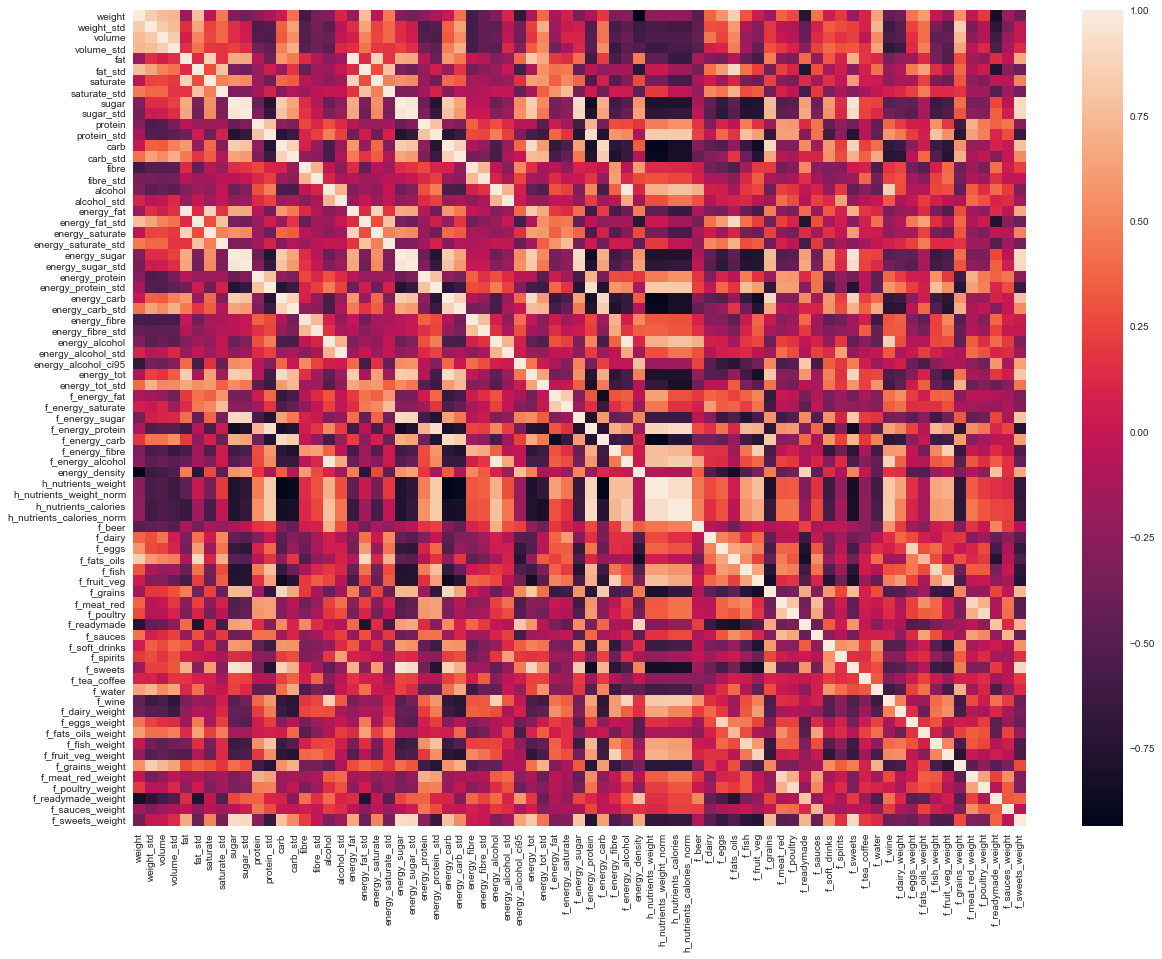

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(tesco_126.corr())
plt.show()

In [18]:
tesco_126.drop('h_nutrients_weight', axis=1, inplace=True)
tesco_126.drop('h_nutrients_calories', axis=1, inplace=True)
tesco_126.drop('energy_carb', axis=1, inplace=True) 
tesco_126.drop('energy_carb_std', axis=1, inplace=True)
tesco_126.drop('energy_protein_std', axis=1, inplace=True)
tesco_126.drop('sugar_std', axis=1, inplace=True)
tesco_126.drop('carb_std', axis=1, inplace=True)
tesco_126.drop('volume', axis=1, inplace=True)
tesco_126.drop('energy_sugar', axis=1, inplace=True)
tesco_126.drop('energy_sugar_std', axis=1, inplace=True)
tesco_126.drop('energy_protein', axis=1, inplace=True)
tesco_126.drop('energy_fat_std', axis=1, inplace=True)
tesco_126.drop('energy_fat', axis=1, inplace=True)
tesco_126.drop('energy_saturate', axis=1, inplace=True)
tesco_126.drop('energy_saturate_std', axis=1, inplace=True)
tesco_126.drop('energy_fibre', axis=1, inplace=True)
tesco_126.drop('energy_fibre_std', axis=1, inplace=True)
tesco_126.drop('energy_alcohol', axis=1, inplace=True)
tesco_126.drop('energy_alcohol_std', axis=1, inplace=True)
tesco_126.drop('energy_alcohol_ci95', axis=1, inplace=True)
tesco_126.shape

(500, 56)

In [19]:
tesco_126.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weight                     500 non-null    float64
 1   weight_std                 500 non-null    float64
 2   volume_std                 500 non-null    float64
 3   fat                        500 non-null    float64
 4   fat_std                    500 non-null    float64
 5   saturate                   500 non-null    float64
 6   saturate_std               500 non-null    float64
 7   sugar                      500 non-null    float64
 8   protein                    500 non-null    float64
 9   protein_std                500 non-null    float64
 10  carb                       500 non-null    float64
 11  fibre                      500 non-null    float64
 12  fibre_std                  500 non-null    float64
 13  alcohol                    500 non-null    float64

In [20]:
# separate dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(tesco_126.drop(labels=['diabetes_category'], axis=1),tesco_126['diabetes_category'],test_size=0.3,random_state=0)


#Creating copies
X_train_org=X_train.copy()
X_test_org=X_test.copy()

In [21]:
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(tesco_org.drop(labels=['diabetes_category'], axis=1),tesco_org['diabetes_category'],test_size=0.3,random_state=0)


In [22]:
X_train.shape

(350, 55)

In [23]:
Y_train.shape

(350,)

In [24]:
X_test.shape

(150, 55)

In [25]:
Y_test.shape

(150,)

In [26]:
#ONLY RUN THIS FOR FILTER FEATURE SELECTION
Y_train = Y_train.to_frame()
Y_test = Y_test.to_frame()

In [27]:
scaler = MinMaxScaler()
stand = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train_org.columns)

X_test = pd.DataFrame(X_test, columns=X_test_org.columns)


In [28]:
i_scores = mutual_info_classif(X_train.values, Y_train.values)

IG_DF = pd.DataFrame(i_scores,index = X_train.columns, columns =['I-Gain'])
IG_DF.sort_values(by=['I-Gain'],ascending=False,inplace=True)
IG_DF

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,I-Gain
h_nutrients_weight_norm,0.398143
h_nutrients_calories_norm,0.344735
carb,0.319902
f_energy_carb,0.306954
f_energy_protein,0.303798
weight_std,0.301128
volume_std,0.300165
f_grains,0.268857
f_wine,0.260467
f_grains_weight,0.257447


<h3>Mutual Information
Mutual information a measure of the mutual dependence of two variables. It measures the amount of information obtained about one variable through observing the other variable. In other words, it determines how much we can know about one variable by understanding another—it’s a little bit like correlation, but mutual information is more general.
In machine learning, mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.
If X and Y are independent, their MI is Zero. If X is deterministic of Y, then MI is the entropy of X, which is a notion in information theory that measures or quantifies the amount of information within a variable. </h3>

In [30]:
# create the SelectKBest with the mutual info strategy.
select_k = 15

fit_ig = SelectKBest(mutual_info_classif, k=select_k).fit(X_train, Y_train)

dfscores = pd.DataFrame(fit_ig.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_IG'] 
#print 10 best features
print(featureScores.nlargest(15,'Score_IG')) 

# display the retained features.
features = X_train.columns[fit.get_support()]

x_train_ig = fit_ig.transform(X_train)
x_test_ig = fit_ig.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


             Selected_columns  Score_IG
25    h_nutrients_weight_norm  0.398143
26  h_nutrients_calories_norm  0.344735
10                       carb  0.319902
21              f_energy_carb  0.306390
20           f_energy_protein  0.301834
1                  weight_std  0.301128
2                  volume_std  0.300165
33                   f_grains  0.267190
43                     f_wine  0.260603
49            f_grains_weight  0.257447
0                      weight  0.255590
9                 protein_std  0.255300
22             f_energy_fibre  0.237156
47              f_fish_weight  0.230617
44             f_dairy_weight  0.207687


NameError: name 'fit' is not defined

<h3>Chi-squared Score
This is another statistical method that’s commonly used for testing relationships between categorical variables.
Therefore, it’s suited for categorical variables and binary targets only, and the variables should be non-negative and typically boolean, frequencies, or counts.
What it does is simply compare the observed distribution between various features in the dataset and the target variable.</h3>

In [31]:
# # apply the chi2 score on the data and target (target should be binary). 
# select_k = 10

# fit = SelectKBest(chi2, k=select_k).fit(X_train, Y_train)

# dfscores = pd.DataFrame(fit.scores_)
# #create df for column names
# dfcolumns = pd.DataFrame(X_train.columns)

# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# #naming the dataframe columns
# featureScores.columns = ['Selected_columns','Score_chi2'] 
# #print 10 best features
# print(featureScores.nlargest(20,'Score_chi2')) 

# # display the k selected features.
# features = X_train.columns[fit.get_support()]
# print(features)

<h3>ANOVA Univariate Test
A univariate test, or more specifically ANOVA ( — short for ANalysis Of VAriance), is similar to the previous scores, as it measures the dependence of two variables.
ANOVA assumes a linear relationship between the variables and the target, and also that the variables are normally distributed.
It’s well-suited for continuous variables and requires a binary target, but sklearn extends it to regression problems, also. </h3>

In [32]:
# select the number of features you want to retain.
select_k = 15

# create the SelectKBest with the mutual info strategy.
fit = SelectKBest(f_classif, k=select_k).fit(X_train, Y_train)

dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_ANOVA'] 
#print 10 best features
print(featureScores.nlargest(15,'Score_ANOVA')) 

# display the retained features.
features = X_train.columns[fit.get_support()]

featureScores.sort_values(by=['Score_ANOVA'],ascending=False,inplace=True)

             Selected_columns  Score_ANOVA
25    h_nutrients_weight_norm   196.361036
21              f_energy_carb   157.254528
2                  volume_std   150.070427
43                     f_wine   137.951700
26  h_nutrients_calories_norm   132.057788
10                       carb   122.350415
49            f_grains_weight   119.921445
20           f_energy_protein   115.602773
22             f_energy_fibre   110.771327
9                 protein_std   110.079182
1                  weight_std   106.441069
44             f_dairy_weight    95.419355
32                f_fruit_veg    85.498647
33                   f_grains    79.196648
47              f_fish_weight    73.945648


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<h3>Univariate ROC-AUC /RMSE
This method uses machine learning models to measure the dependence of two variables. It’s suitable for all variables, and also makes no assumptions about their distribution.
The measure here depends on the problem: we use RMSE for regression problems and ROC-AUC for classification problems.
The procedure is as follows:
Build a decision tree using a single variable and target.
Rank features according to the model RMSE or ROC-AUC
Select the features with higher ranking scores.</h3>

In [33]:
# # list of the resulting scores.
# roc_values = []

# # loop over all features and calculate the score.
# for feature in X_train.columns:
#     clf = DecisionTreeClassifier()
#     clf.fit(X_train[[feature]], Y_train)
#     y_scored = clf.predict(X_test[[feature]])
    
#     roc_values.append(roc_auc_score(Y_test, y_scored))

# # create a Pandas Series for visualisation.
# roc_values = pd.Series(roc_values)
# roc_values.index = X_train.columns

# # show the results.
# print(roc_values.sort_values(ascending=False))

In [34]:
top3_DF = X_train[IG_DF.index[:12]]
X_top3 = top3_DF.values

In [35]:
kNN = KNeighborsClassifier(n_neighbors=10)

knn_top = cross_val_score(kNN, X_top3, Y_train.values, cv=10, n_jobs=-1, verbose=1)
print("10x CV Accuracy Top 3 features: {0:.2f}".format(knn_top.mean()))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


10x CV Accuracy Top 3 features: 0.81


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


In [36]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)

knn_top = cross_val_score(dtc, X_top3, Y_train.values, cv=10)
print("10x CV Accuracy Top 3 features: {0:.2f}".format(knn_top.mean()))


10x CV Accuracy Top 3 features: 0.75


In [37]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)

knn_top = cross_val_score(clf, X_top3, Y_train.values, cv=10)
print("10x CV Accuracy Top 3 features: {0:.2f}".format(knn_top.mean()))

10x CV Accuracy Top 3 features: 0.79


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

<h1> CLASSIFIERS </h1>

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)

from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB()
dtc = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_svm = svm.SVC(kernel='linear', C=1)

<h1> FORWARD </h1>

In [39]:
#FORWARD - SVM 
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_f_svm = SequentialFeatureSelector(clf_svm, 
           k_features=15, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           verbose = 1,
           n_jobs=-1,                           
           cv=10)
sfs_f_svm = sfs_f_svm.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_f_svm.k_feature_idx_)]
print(selected_features)

print(sfs_f_svm.k_feature_names_)
print(sfs_f_svm.k_score_)

# transform to the newly selected features.
x_train_sfs_svm = sfs_f_svm.transform(X_train)
x_test_sfs_svm = sfs_f_svm.transform(X_test)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.0s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.4s finished
Features: 2/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.5s finished
Features: 3/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.4s finished
Features: 4/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:   

Index(['weight_std', 'fat', 'fat_std', 'saturate_std', 'protein',
       'f_energy_sugar', 'h_nutrients_weight_norm',
       'h_nutrients_calories_norm', 'f_dairy', 'f_fats_oils', 'f_meat_red',
       'f_tea_coffee', 'f_eggs_weight', 'f_fish_weight', 'f_meat_red_weight'],
      dtype='object')
('weight_std', 'fat', 'fat_std', 'saturate_std', 'protein', 'f_energy_sugar', 'h_nutrients_weight_norm', 'h_nutrients_calories_norm', 'f_dairy', 'f_fats_oils', 'f_meat_red', 'f_tea_coffee', 'f_eggs_weight', 'f_fish_weight', 'f_meat_red_weight')
0.8371428571428572


In [42]:
#Predicting Forward SVM
clf_svm = svm.SVC(kernel='linear',C=1)
clf_svm.fit(x_train_sfs_svm, Y_train)
y_pred_svm = clf_svm.predict(x_test_sfs_svm)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_svm).sum()) / y_pred_svm.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(clf_svm, classes=["high","low", "mid"], support=True, average='micro')

visualizer.fit(x_train_sfs_svm, Y_train)        # Fit the visualizer and the model
visualizer.score(x_test_sfs_svm, Y_test)        # Evaluate the model on the test data
visualizer.show() 

print(visualizer.scores_)
#ConfusionMatrix
cm = ConfusionMatrix(clf_svm, classes=["high","low", "mid"])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train_sfs_svm, Y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test_sfs_svm, Y_test)

# How did we do?
cm.show()
print(confusion_matrix(Y_test, y_pred_svm))

# from sklearn.metrics import confusion_matrix

#ROCAUC
visualizer = ROCAUC(clf_svm, classes=["high","low", "mid"], average= "micro")

visualizer.fit(x_train_sfs_svm, Y_train)        # Fit the training data to the visualizer
visualizer.score(x_test_sfs_svm, Y_test)        # Evaluate the model on the test data
visualizer.show()  

viz = PrecisionRecallCurve(
    clf_svm,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_sfs_svm, Y_train)
viz.score(x_test_sfs_svm, Y_test)
viz.show()

print("F1 SCORE: Forward SVM",f1_score(Y_test, y_pred_svm, average='micro'))
print("Cohen Kappa: Forward SVM",cohen_kappa_score(Y_test, y_pred_svm))
print("CR Report: Forward SVM \n",classification_report(Y_test, y_pred_svm))
print("MCC: Forward SVM",matthews_corrcoef(Y_test, y_pred_svm))
print("Accuracy: Forward SVM",accuracy_score(Y_test, y_pred_svm))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unable to coerce to Series, length must be 1: given 150

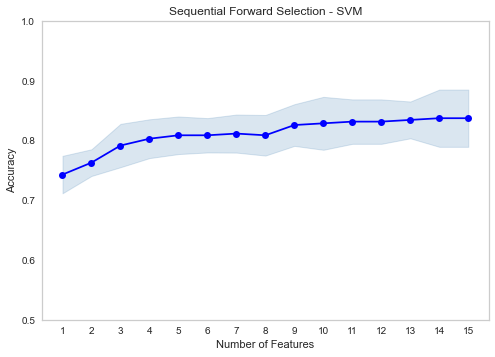

('weight_std', 'fat', 'fat_std', 'saturate_std', 'protein', 'f_energy_sugar', 'h_nutrients_weight_norm', 'h_nutrients_calories_norm', 'f_dairy', 'f_fats_oils', 'f_meat_red', 'f_tea_coffee', 'f_eggs_weight', 'f_fish_weight', 'f_meat_red_weight')


In [43]:
#PLOTTING FORWARD - SVM
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_f_svm.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection - SVM')
plt.grid()
plt.show()
print(sfs_f_svm.k_feature_names_)

In [798]:
#FORWARD - DTC
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_f_dtc = SequentialFeatureSelector(dtc, 
           k_features=15, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           verbose = 1,
           n_jobs=-1,
           cv=10)
sfs_f_dtc = sfs_f_dtc.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_f_dtc.k_feature_idx_)]
print(selected_features)

print(sfs_f_dtc.k_feature_names_)
print(sfs_f_dtc.k_score_)

# transform to the newly selected features.
x_train_sfs_dtc = sfs_f_dtc.transform(X_train)
x_test_sfs_dtc = sfs_f_dtc.transform(X_test)

print(x_train_sfs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.2s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.2s finished
Features: 2/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.2s finished
Features: 3/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished
Features: 4/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out o

Index(['sugar', 'protein_std', 'energy_tot', 'f_energy_saturate',
       'f_energy_carb', 'energy_density', 'h_nutrients_weight_norm', 'f_beer',
       'f_grains', 'f_sauces', 'f_sweets', 'f_water', 'f_eggs_weight',
       'f_fish_weight', 'f_sweets_weight'],
      dtype='object')
('sugar', 'protein_std', 'energy_tot', 'f_energy_saturate', 'f_energy_carb', 'energy_density', 'h_nutrients_weight_norm', 'f_beer', 'f_grains', 'f_sauces', 'f_sweets', 'f_water', 'f_eggs_weight', 'f_fish_weight', 'f_sweets_weight')
0.8142857142857143
[[3.10092031e+02 3.71880507e+02 8.72467190e+01 ... 6.89730000e-02
  2.00780000e-02 1.48135000e-01]
 [4.30134087e+02 5.47137588e+02 1.10893670e+02 ... 5.95730000e-02
  1.62090000e-02 9.61580000e-02]
 [4.15873111e+02 4.40699255e+02 1.06542508e+02 ... 4.44680000e-02
  1.26540000e-02 8.97840000e-02]
 ...
 [3.29789559e+02 4.02232546e+02 1.16079040e+02 ... 7.19700000e-02
  1.42240000e-02 1.26502000e-01]
 [4.21917574e+02 5.34591830e+02 1.06927779e+02 ... 5.23850000e-02


In [799]:
#Predicting Forward DTC
dtc.fit(x_train_sfs_dtc, Y_train)
y_pred_dtc = dtc.predict(x_test_sfs_dtc)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_dtc).sum()) / y_pred_dtc.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 73.33 %


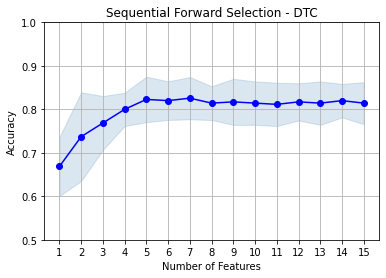

('sugar', 'protein_std', 'energy_tot', 'f_energy_saturate', 'f_energy_carb', 'energy_density', 'h_nutrients_weight_norm', 'f_beer', 'f_grains', 'f_sauces', 'f_sweets', 'f_water', 'f_eggs_weight', 'f_fish_weight', 'f_sweets_weight')


In [800]:
#PLOTTING FORWARD - DTC
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_f_dtc.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection - DTC')
plt.grid()
plt.show()
print(sfs_f_dtc.k_feature_names_)

In [801]:
#FORWARD - NAIVE BAYES
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_f_naive = SequentialFeatureSelector(model_naive, 
           k_features=15, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           verbose = 1,
           n_jobs=-1,
           cv=10)
sfs_f_naive = sfs_f_naive.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_f_naive.k_feature_idx_)]
print(selected_features)

print(sfs_f_naive.k_feature_names_)
print(sfs_f_naive.k_score_)

# transform to the newly selected features.
x_train_sfs_naive = sfs_f_naive.transform(X_train)
x_test_sfs_naive = sfs_f_naive.transform(X_test)

print(x_train_sfs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.1s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.1s finished
Features: 2/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.1s finished
Features: 3/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.1s finished
Features: 4/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished
Features: 5/15[Parallel(n_jobs=-1)]: Using back

Index(['weight', 'weight_std', 'volume_std', 'fat', 'fat_std', 'saturate',
       'saturate_std', 'sugar', 'protein', 'protein_std', 'carb', 'fibre',
       'fibre_std', 'alcohol', 'f_readymade_weight'],
      dtype='object')
('weight', 'weight_std', 'volume_std', 'fat', 'fat_std', 'saturate', 'saturate_std', 'sugar', 'protein', 'protein_std', 'carb', 'fibre', 'fibre_std', 'alcohol', 'f_readymade_weight')
0.6199999999999999
[[3.10092031e+02 3.71880507e+02 8.72467190e+01 ... 6.89730000e-02
  2.00780000e-02 1.48135000e-01]
 [4.30134087e+02 5.47137588e+02 1.10893670e+02 ... 5.95730000e-02
  1.62090000e-02 9.61580000e-02]
 [4.15873111e+02 4.40699255e+02 1.06542508e+02 ... 4.44680000e-02
  1.26540000e-02 8.97840000e-02]
 ...
 [3.29789559e+02 4.02232546e+02 1.16079040e+02 ... 7.19700000e-02
  1.42240000e-02 1.26502000e-01]
 [4.21917574e+02 5.34591830e+02 1.06927779e+02 ... 5.23850000e-02
  1.54690000e-02 1.10539000e-01]
 [4.17858232e+02 4.34921201e+02 1.06941114e+02 ... 4.43200000e-02
  1.62

In [1085]:
#Predicting Forward Naive Bayes
model_naive = GaussianNB()
model_naive.fit(x_train_sfs_naive, Y_train)
y_pred_naive = model_naive.predict(x_test_sfs_naive)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_naive).sum()) / y_pred_naive.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 67.33 %


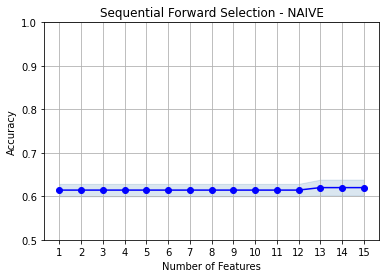

('weight', 'weight_std', 'volume_std', 'fat', 'fat_std', 'saturate', 'saturate_std', 'sugar', 'protein', 'protein_std', 'carb', 'fibre', 'fibre_std', 'alcohol', 'f_readymade_weight')


In [803]:
#PLOTTING FORWARD - NAIVE BAYES
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_f_naive.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection - NAIVE')
plt.grid()
plt.show()
print(sfs_f_naive.k_feature_names_)

In [804]:
#FORWARD - KNN
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_f_knn = SequentialFeatureSelector(knn, 
           k_features=15, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           verbose = 1,
           n_jobs=-1,
           cv=10)
sfs_f_knn = sfs_f_knn.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_f_knn.k_feature_idx_)]
print(selected_features)

print(sfs_f_knn.k_feature_names_)
print(sfs_f_knn.k_score_)

# transform to the newly selected features.
x_train_sfs_knn = sfs_f_knn.transform(X_train)
x_test_sfs_knn = sfs_f_knn.transform(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.2s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.2s finished
Features: 2/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.2s finished
Features: 3/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished
Features: 4/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out o

Index(['weight', 'weight_std', 'fat', 'saturate', 'sugar', 'protein_std',
       'fibre_std', 'f_energy_protein', 'energy_density', 'f_dairy',
       'f_grains', 'f_sauces', 'f_spirits', 'f_fish_weight',
       'f_meat_red_weight'],
      dtype='object')
('weight', 'weight_std', 'fat', 'saturate', 'sugar', 'protein_std', 'fibre_std', 'f_energy_protein', 'energy_density', 'f_dairy', 'f_grains', 'f_sauces', 'f_spirits', 'f_fish_weight', 'f_meat_red_weight')
0.8428571428571429


In [805]:
#Predicting Forward KNN
knn.fit(x_train_sfs_knn, Y_train)
y_pred_knn = knn.predict(x_test_sfs_knn)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_knn).sum()) / y_pred_knn.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 74.67 %


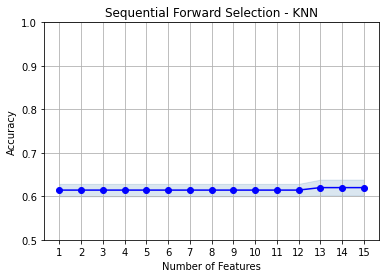

('weight', 'weight_std', 'volume_std', 'fat', 'fat_std', 'saturate', 'saturate_std', 'sugar', 'protein', 'protein_std', 'carb', 'fibre', 'fibre_std', 'alcohol', 'f_readymade_weight')


In [806]:
#PLOTTING FORWARD - KNN
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_f_naive.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection - KNN')
plt.grid()
plt.show()
print(sfs_f_naive.k_feature_names_)

In [807]:
#FORWARD - Random Classifier
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_f_rfc = SequentialFeatureSelector(RandomForestClassifier(), 
           k_features=15, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           verbose = 1,
           n_jobs=-1,
           cv=10)
sfs_f_rfc = sfs_f_rfc.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_f_rfc.k_feature_idx_)]
print(selected_features)

print(sfs_f_rfc.k_feature_names_)
print(sfs_f_rfc.k_score_)

# transform to the newly selected features.
x_train_sfs_rfc = sfs_f_rfc.transform(X_train)
x_test_sfs_rfc = sfs_f_rfc.transform(X_test)

print(x_train_sfs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   19.4s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   19.1s finished
Features: 2/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:   17.8s finished
Features: 3/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:   17.7s finished
Features: 4/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 

Index(['weight', 'weight_std', 'fat', 'saturate_std', 'protein', 'protein_std',
       'alcohol', 'f_energy_protein', 'h_nutrients_weight_norm', 'f_beer',
       'f_grains', 'f_sauces', 'f_soft_drinks', 'f_fish_weight',
       'f_meat_red_weight'],
      dtype='object')
('weight', 'weight_std', 'fat', 'saturate_std', 'protein', 'protein_std', 'alcohol', 'f_energy_protein', 'h_nutrients_weight_norm', 'f_beer', 'f_grains', 'f_sauces', 'f_soft_drinks', 'f_fish_weight', 'f_meat_red_weight')
0.8657142857142859
[[3.10092031e+02 3.71880507e+02 8.72467190e+01 ... 6.89730000e-02
  2.00780000e-02 1.48135000e-01]
 [4.30134087e+02 5.47137588e+02 1.10893670e+02 ... 5.95730000e-02
  1.62090000e-02 9.61580000e-02]
 [4.15873111e+02 4.40699255e+02 1.06542508e+02 ... 4.44680000e-02
  1.26540000e-02 8.97840000e-02]
 ...
 [3.29789559e+02 4.02232546e+02 1.16079040e+02 ... 7.19700000e-02
  1.42240000e-02 1.26502000e-01]
 [4.21917574e+02 5.34591830e+02 1.06927779e+02 ... 5.23850000e-02
  1.54690000e-02 1.105

In [1079]:
#Predicting Forward RFC
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(x_train_sfs_rfc, Y_train)
y_pred_rfc = rfc.predict(x_test_sfs_rfc)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_rfc).sum()) / y_pred_rfc.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 79.33 %


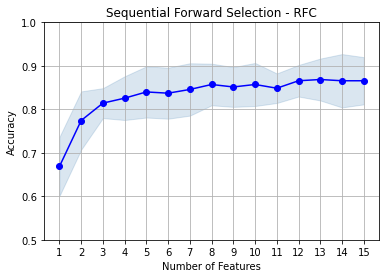

('weight', 'weight_std', 'fat', 'saturate_std', 'protein', 'protein_std', 'alcohol', 'f_energy_protein', 'h_nutrients_weight_norm', 'f_beer', 'f_grains', 'f_sauces', 'f_soft_drinks', 'f_fish_weight', 'f_meat_red_weight')


In [809]:
#PLOTTING FORWARD - Random Classifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_f_rfc.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection - RFC')
plt.grid()
plt.show()
print(sfs_f_rfc.k_feature_names_)

<h1> BACKWARD </h1>

In [810]:
#BACKWARD - SVM 
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_b_svm = SequentialFeatureSelector(clf_svm, 
           k_features=15, 
           forward=False, 
           floating=False,
           scoring='accuracy',
           verbose = 1,
           n_jobs=-1,
           cv=10)
sfs_b_svm = sfs_b_svm.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_b_svm.k_feature_idx_)]
print(selected_features)

print(sfs_b_svm.k_feature_names_)
print(sfs_b_svm.k_score_)

# transform to the newly selected features.
x_train_sfs_b_svm = sfs_b_svm.transform(X_train)
x_test_sfs_b_svm = sfs_b_svm.transform(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.4s finished
Features: 54/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.5s finished
Features: 53/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.4s finished
Features: 52/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.4s finished
Features: 51/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  51 o

Index(['weight', 'weight_std', 'saturate_std', 'protein_std', 'f_energy_sugar',
       'f_energy_alcohol', 'f_dairy', 'f_grains', 'f_meat_red', 'f_poultry',
       'f_spirits', 'f_eggs_weight', 'f_fish_weight', 'f_meat_red_weight',
       'f_readymade_weight'],
      dtype='object')
('weight', 'weight_std', 'saturate_std', 'protein_std', 'f_energy_sugar', 'f_energy_alcohol', 'f_dairy', 'f_grains', 'f_meat_red', 'f_poultry', 'f_spirits', 'f_eggs_weight', 'f_fish_weight', 'f_meat_red_weight', 'f_readymade_weight')
0.8457142857142858


In [811]:
#Predicting Backward SVM
clf_svm.fit(x_train_sfs_b_svm, Y_train)
y_pred_b_svm = clf_svm.predict(x_test_sfs_b_svm)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_b_svm).sum()) / y_pred_b_svm.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 74.00 %


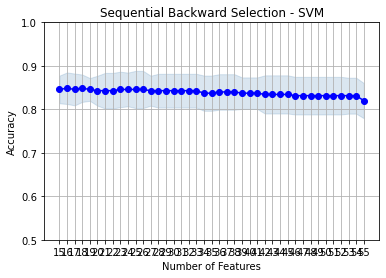

('weight', 'weight_std', 'saturate_std', 'protein_std', 'f_energy_sugar', 'f_energy_alcohol', 'f_dairy', 'f_grains', 'f_meat_red', 'f_poultry', 'f_spirits', 'f_eggs_weight', 'f_fish_weight', 'f_meat_red_weight', 'f_readymade_weight')


In [812]:
#PLOTTING BACKWARD - SVM
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_b_svm.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection - SVM')
plt.grid()
plt.show()
print(sfs_b_svm.k_feature_names_)

In [813]:
#BACKWARD - DTC
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_b_dtc = SequentialFeatureSelector(dtc, 
           k_features=15, 
           forward=False, 
           floating=False,
           scoring='accuracy',
           verbose = 1,
           cv=10,
           n_jobs=-1)
sfs_b_dtc = sfs_b_dtc.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_b_dtc.k_feature_idx_)]
print(selected_features)

print(sfs_b_dtc.k_feature_names_)
print(sfs_b_dtc.k_score_)

# transform to the newly selected features.
x_train_sfs_b_dtc = sfs_b_dtc.transform(X_train)
x_test_sfs_b_dtc = sfs_b_dtc.transform(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.5s finished
Features: 54/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.4s finished
Features: 53/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.4s finished
Features: 52/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.4s finished
Features: 51/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

Index(['weight_std', 'volume_std', 'fat', 'protein', 'carb', 'f_energy_fat',
       'f_energy_sugar', 'f_energy_protein', 'f_energy_carb', 'f_energy_fibre',
       'f_grains', 'f_water', 'f_wine', 'f_eggs_weight', 'f_readymade_weight'],
      dtype='object')
('weight_std', 'volume_std', 'fat', 'protein', 'carb', 'f_energy_fat', 'f_energy_sugar', 'f_energy_protein', 'f_energy_carb', 'f_energy_fibre', 'f_grains', 'f_water', 'f_wine', 'f_eggs_weight', 'f_readymade_weight')
0.8371428571428572


Test set accuracy: 76.00 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


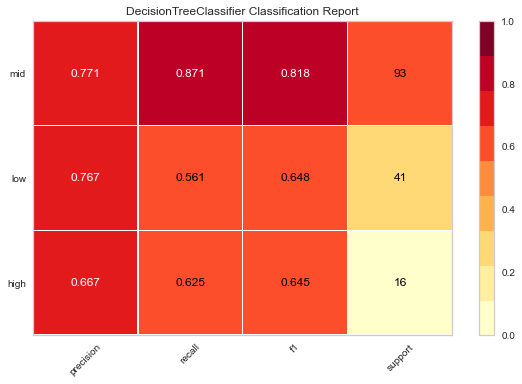

{'precision': {'high': 0.6666666666666666, 'low': 0.7666666666666667, 'mid': 0.7714285714285715}, 'recall': {'high': 0.625, 'low': 0.5609756097560976, 'mid': 0.8709677419354839}, 'f1': {'high': 0.6451612903225806, 'low': 0.6478873239436621, 'mid': 0.8181818181818182}, 'support': {'high': 0.10666666666666667, 'low': 0.2733333333333333, 'mid': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


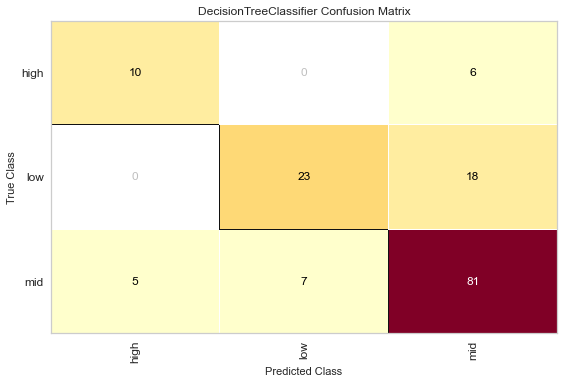

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


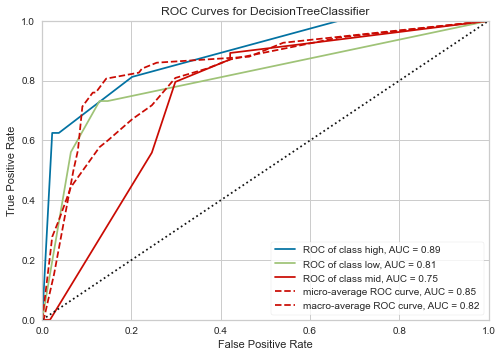

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:256: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


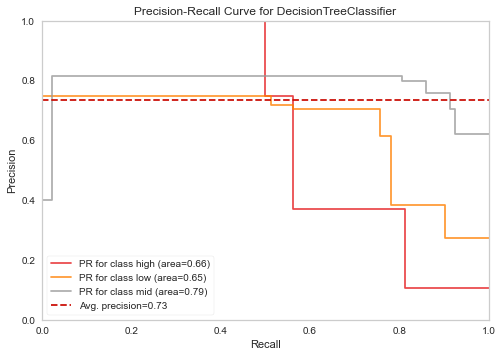

Confusion Matrix: Backward DTC 
 [[10  0  6]
 [ 0 23 18]
 [ 5  7 81]]
F1 SCORE: Backward DTC 0.7933333333333333
Cohen Kappa: Backward DTC 0.5206391478029294
CR Report: Backward DTC 
               precision    recall  f1-score   support

        high       0.67      0.62      0.65        16
         low       0.77      0.56      0.65        41
         mid       0.77      0.87      0.82        93

    accuracy                           0.76       150
   macro avg       0.73      0.69      0.70       150
weighted avg       0.76      0.76      0.75       150

MCC: Backward DTC 0.5281643011010201
Accuracy: Backward DTC 0.76


In [1076]:
#Predicting Backward DTC
dtc = DecisionTreeClassifier(criterion="entropy", random_state=0, splitter="best", max_depth=3)

dtc.fit(x_train_sfs_b_dtc, Y_train)
y_pred_b_dtc = dtc.predict(x_test_sfs_b_dtc)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_b_dtc).sum()) / y_pred_b_dtc.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(dtc, classes=["high","low", "mid"], support=True, average='micro')

visualizer.fit(x_train_sfs_b_dtc, Y_train)        # Fit the visualizer and the model
visualizer.score(x_test_sfs_b_dtc, Y_test)        # Evaluate the model on the test data
visualizer.show() 
print(visualizer.scores_)

#ConfusionMatrix
cm = ConfusionMatrix(dtc, classes=["high","low", "mid"])
cm.fit(x_train_sfs_b_dtc, Y_train)
cm.score(x_test_sfs_b_dtc, Y_test)
cm.show()

#ROCAUC
visualizer = ROCAUC(dtc, classes=["high","low", "mid"], average= "micro")

visualizer.fit(x_train_sfs_b_dtc, Y_train)        # Fit the training data to the visualizer
visualizer.score(x_test_sfs_b_dtc, Y_test)        # Evaluate the model on the test data
visualizer.show()  

viz = PrecisionRecallCurve(
    dtc,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_sfs_b_dtc, Y_train)
viz.score(x_test_sfs_b_dtc, Y_test)
viz.show()

print("Confusion Matrix: Backward DTC \n",confusion_matrix(Y_test, y_pred_b_dtc))
print("F1 SCORE: Backward DTC",f1_score(Y_test, y_pred_svm, average='micro'))
print("Cohen Kappa: Backward DTC",cohen_kappa_score(Y_test, y_pred_b_dtc))
print("CR Report: Backward DTC \n",classification_report(Y_test, y_pred_b_dtc))
print("MCC: Backward DTC",matthews_corrcoef(Y_test, y_pred_b_dtc))
print("Accuracy: Backward DTC",accuracy_score(Y_test, y_pred_b_dtc))

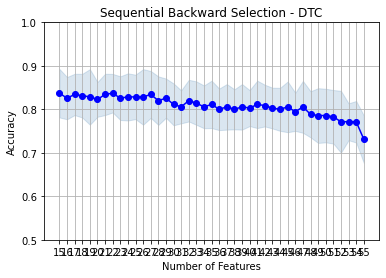

('weight_std', 'volume_std', 'fat', 'protein', 'carb', 'f_energy_fat', 'f_energy_sugar', 'f_energy_protein', 'f_energy_carb', 'f_energy_fibre', 'f_grains', 'f_water', 'f_wine', 'f_eggs_weight', 'f_readymade_weight')


In [815]:
#PLOTTING BACKWARD - DTC
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_b_dtc.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection - DTC')
plt.grid()
plt.show()
print(sfs_b_dtc.k_feature_names_)

In [816]:
#BACKWARD - NAIVE
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_b_naive = SequentialFeatureSelector(model_naive, 
           k_features=15, 
           forward=False, 
           floating=False,
           scoring='accuracy',
           cv=10, 
           n_jobs=-1, 
           verbose=1)
sfs_b_naive = sfs_b_naive.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_b_naive.k_feature_idx_)]
print(selected_features)

print(sfs_b_naive.k_feature_names_)
print(sfs_b_naive.k_score_)

# transform to the newly selected features.
x_train_sfs_b_naive = sfs_b_naive.transform(X_train)
x_test_sfs_b_naive = sfs_b_naive.transform(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.2s finished
Features: 53/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.1s finished
Features: 52/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.1s finished
Features: 51/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished
Features: 50/15[Parallel(n_jobs=-1)]: Using

Index(['weight_std', 'sugar', 'protein_std', 'carb', 'f_energy_fat',
       'f_energy_carb', 'h_nutrients_weight_norm', 'f_fish', 'f_fruit_veg',
       'f_grains', 'f_water', 'f_wine', 'f_dairy_weight', 'f_grains_weight',
       'f_sweets_weight'],
      dtype='object')
('weight_std', 'sugar', 'protein_std', 'carb', 'f_energy_fat', 'f_energy_carb', 'h_nutrients_weight_norm', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_water', 'f_wine', 'f_dairy_weight', 'f_grains_weight', 'f_sweets_weight')
0.6914285714285715


Test set accuracy: 72.67 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


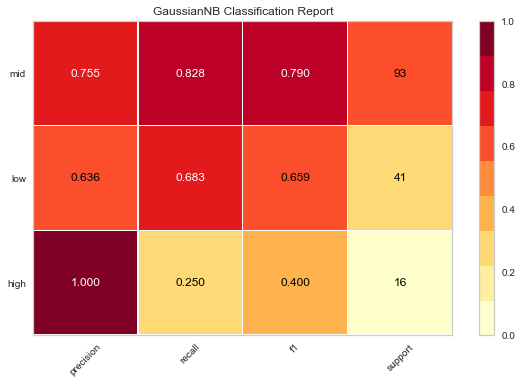

{'precision': {'high': 1.0, 'low': 0.6363636363636364, 'mid': 0.7549019607843137}, 'recall': {'high': 0.25, 'low': 0.6829268292682927, 'mid': 0.8279569892473119}, 'f1': {'high': 0.4, 'low': 0.6588235294117647, 'mid': 0.7897435897435897}, 'support': {'high': 0.10666666666666667, 'low': 0.2733333333333333, 'mid': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


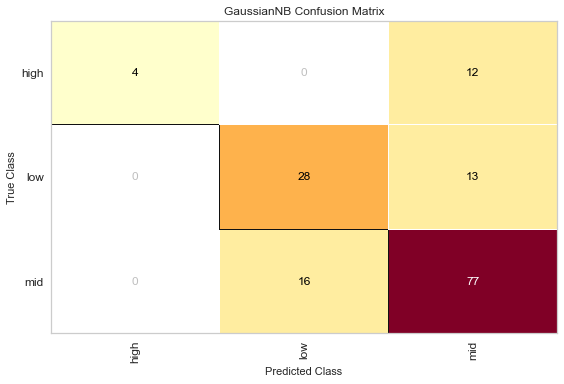

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


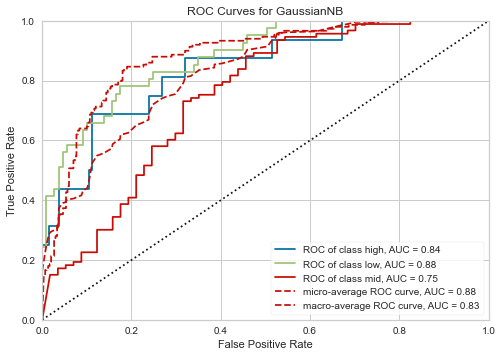

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:256: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


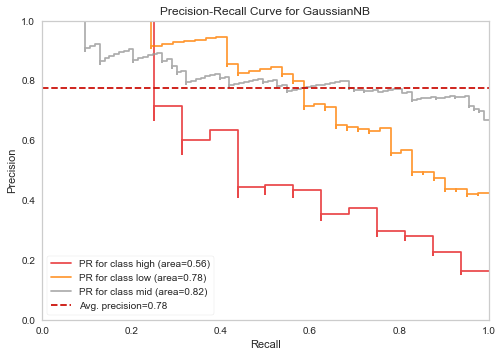

Confusion Matrix: Backward NAIVE 
 [[ 4  0 12]
 [ 0 28 13]
 [ 0 16 77]]
F1 SCORE: Backward NAIVE 0.6266666666666667
Cohen Kappa: Backward NAIVE 0.4482325497936479
CR Report: Backward NAIVE 
               precision    recall  f1-score   support

        high       1.00      0.25      0.40        16
         low       0.64      0.68      0.66        41
         mid       0.75      0.83      0.79        93

    accuracy                           0.73       150
   macro avg       0.80      0.59      0.62       150
weighted avg       0.75      0.73      0.71       150

MCC: Backward NAIVE 0.45445303856738445
Accuracy: Backward NAIVE 0.7266666666666667


In [993]:
#Predicting Backward NAIVE
model_naive = GaussianNB()

model_naive.fit(x_train_sfs_b_naive, Y_train)
y_pred_b_naive = model_naive.predict(x_test_sfs_b_naive)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_b_naive).sum()) / y_pred_b_naive.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(model_naive, classes=["high","low", "mid"], support=True, average='micro')
visualizer.fit(x_train_sfs_b_naive, Y_train)        # Fit the visualizer and the model
visualizer.score(x_test_sfs_b_naive, Y_test)        # Evaluate the model on the test data
visualizer.show() 
print(visualizer.scores_)

#ConfusionMatrix
cm = ConfusionMatrix(model_naive, classes=["high","low", "mid"])
cm.fit(x_train_sfs_b_naive, Y_train)
cm.score(x_test_sfs_b_naive, Y_test)
cm.show()

#ROCAUC
visualizer = ROCAUC(model_naive, classes=["high","low", "mid"], average= "micro")
visualizer.fit(x_train_sfs_b_naive, Y_train)        # Fit the training data to the visualizer
visualizer.score(x_test_sfs_b_naive, Y_test)        # Evaluate the model on the test data
visualizer.show()  

#PrecisionRecall Curve
viz = PrecisionRecallCurve(
    model_naive,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_sfs_b_naive, Y_train)
viz.score(x_test_sfs_b_naive, Y_test)
viz.show()

print("Confusion Matrix: Backward NAIVE \n",confusion_matrix(Y_test, y_pred_b_naive))
print("F1 SCORE: Backward NAIVE",f1_score(Y_test, y_pred_naive, average='micro'))
print("Cohen Kappa: Backward NAIVE",cohen_kappa_score(Y_test, y_pred_b_naive))
print("CR Report: Backward NAIVE \n",classification_report(Y_test, y_pred_b_naive))
print("MCC: Backward NAIVE",matthews_corrcoef(Y_test, y_pred_b_naive))
print("Accuracy: Backward NAIVE",accuracy_score(Y_test, y_pred_b_naive))

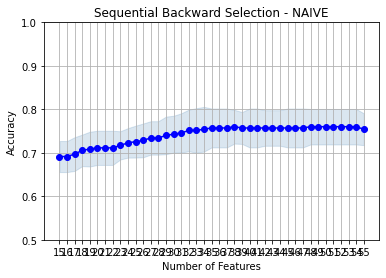

('weight_std', 'sugar', 'protein_std', 'carb', 'f_energy_fat', 'f_energy_carb', 'h_nutrients_weight_norm', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_water', 'f_wine', 'f_dairy_weight', 'f_grains_weight', 'f_sweets_weight')


In [818]:
#PLOTTING BACKWARD - NAIVE
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_b_naive.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection - NAIVE')
plt.grid()
plt.show()
print(sfs_b_naive.k_feature_names_)

In [819]:
#BACKWARD - KNN
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_b_knn = SequentialFeatureSelector(knn, 
           k_features=15, 
           forward=False, 
           floating=False,
           scoring='accuracy',
           cv=10,
           n_jobs=-1, 
           verbose=1)
sfs_b_knn = sfs_b_knn.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_b_knn.k_feature_idx_)]
print(selected_features)

print(sfs_b_knn.k_feature_names_)
print(sfs_b_knn.k_score_)

# transform to the newly selected features.
x_train_sfs_b_knn = sfs_b_knn.transform(X_train)
x_test_sfs_b_knn = sfs_b_knn.transform(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.5s finished
Features: 54/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.5s finished
Features: 53/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.5s finished
Features: 52/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.5s finished
Features: 51/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  51 o

Index(['fat_std', 'saturate_std', 'carb', 'fibre', 'f_energy_carb', 'f_fish',
       'f_poultry', 'f_sauces', 'f_spirits', 'f_water', 'f_wine',
       'f_dairy_weight', 'f_eggs_weight', 'f_fish_weight',
       'f_readymade_weight'],
      dtype='object')
('fat_std', 'saturate_std', 'carb', 'fibre', 'f_energy_carb', 'f_fish', 'f_poultry', 'f_sauces', 'f_spirits', 'f_water', 'f_wine', 'f_dairy_weight', 'f_eggs_weight', 'f_fish_weight', 'f_readymade_weight')
0.8714285714285713


Test set accuracy: 82.00 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


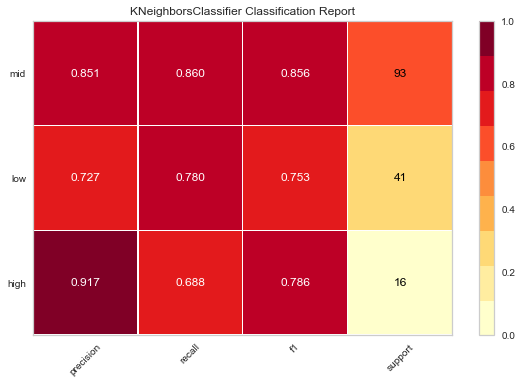

{'precision': {'high': 0.9166666666666666, 'low': 0.7272727272727273, 'mid': 0.851063829787234}, 'recall': {'high': 0.6875, 'low': 0.7804878048780488, 'mid': 0.8602150537634409}, 'f1': {'high': 0.7857142857142857, 'low': 0.7529411764705882, 'mid': 0.8556149732620322}, 'support': {'high': 0.10666666666666667, 'low': 0.2733333333333333, 'mid': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


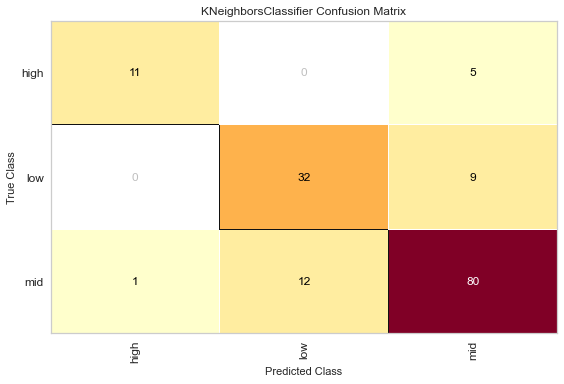

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


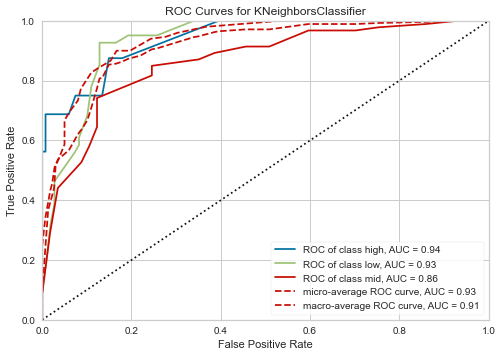

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:256: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


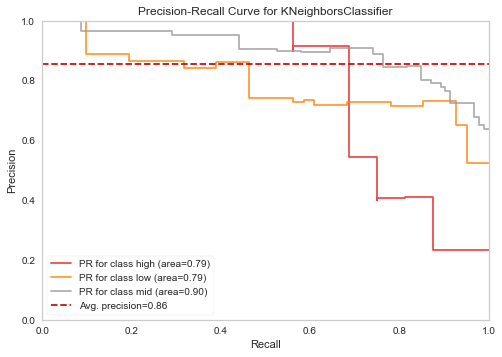

Confusion Matrix: Backward KNN 
 [[11  0  5]
 [ 0 32  9]
 [ 1 12 80]]
F1 SCORE: Backward KNN 0.7466666666666667
Cohen Kappa: Backward KNN 0.6556708042849855
CR Report: Backward KNN 
               precision    recall  f1-score   support

        high       0.92      0.69      0.79        16
         low       0.73      0.78      0.75        41
         mid       0.85      0.86      0.86        93

    accuracy                           0.82       150
   macro avg       0.83      0.78      0.80       150
weighted avg       0.82      0.82      0.82       150

MCC: Backward KNN 0.6564610281147806
Accuracy: Backward KNN 0.82


In [992]:
#Predicting Backward KNN
knn = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)

knn.fit(x_train_sfs_b_knn, Y_train)
y_pred_b_knn = knn.predict(x_test_sfs_b_knn)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_b_knn).sum()) / y_pred_b_knn.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(knn, classes=["high","low", "mid"], support=True, average='micro')
visualizer.fit(x_train_sfs_b_knn, Y_train)        # Fit the visualizer and the model
visualizer.score(x_test_sfs_b_knn, Y_test)        # Evaluate the model on the test data
visualizer.show() 
print(visualizer.scores_)

#ConfusionMatrix
cm = ConfusionMatrix(knn, classes=["high","low", "mid"])
cm.fit(x_train_sfs_b_knn, Y_train)
cm.score(x_test_sfs_b_knn, Y_test)
cm.show()

#ROCAUC
visualizer = ROCAUC(knn, classes=["high","low", "mid"], average= "micro")
visualizer.fit(x_train_sfs_b_knn, Y_train)        # Fit the training data to the visualizer
visualizer.score(x_test_sfs_b_knn, Y_test)        # Evaluate the model on the test data
visualizer.show()  

#PrecisionRecall Curve
viz = PrecisionRecallCurve(
    knn,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_sfs_b_knn, Y_train)
viz.score(x_test_sfs_b_knn, Y_test)
viz.show()

print("Confusion Matrix: Backward KNN \n",confusion_matrix(Y_test, y_pred_b_knn))
print("F1 SCORE: Backward KNN",f1_score(Y_test, y_pred_knn, average='micro'))
print("Cohen Kappa: Backward KNN",cohen_kappa_score(Y_test, y_pred_b_knn))
print("CR Report: Backward KNN \n",classification_report(Y_test, y_pred_b_knn))
print("MCC: Backward KNN",matthews_corrcoef(Y_test, y_pred_b_knn))
print("Accuracy: Backward KNN",accuracy_score(Y_test, y_pred_b_knn))

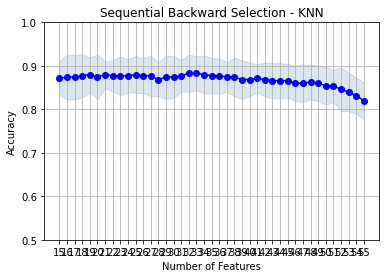

('fat_std', 'saturate_std', 'carb', 'fibre', 'f_energy_carb', 'f_fish', 'f_poultry', 'f_sauces', 'f_spirits', 'f_water', 'f_wine', 'f_dairy_weight', 'f_eggs_weight', 'f_fish_weight', 'f_readymade_weight')


In [821]:
#PLOTTING BACKWARD - KNN
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_b_knn.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection - KNN')
plt.grid()
plt.show()
print(sfs_b_knn.k_feature_names_)

In [822]:
#BACKWARD - Random Classifier
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_b_rfc = SequentialFeatureSelector(RandomForestClassifier(), 
           k_features=15, 
           forward=False, 
           floating=False,
           scoring='accuracy',
           cv=10,
           n_jobs=-1, 
           verbose=1)
sfs_b_rfc = sfs_b_rfc.fit(X_train, Y_train)


selected_features = X_train.columns[list(sfs_b_rfc.k_feature_idx_)]
print(selected_features)

print(sfs_b_rfc.k_feature_names_)
print(sfs_b_rfc.k_score_)

# transform to the newly selected features.
x_train_sfs_b_rfc = sfs_b_rfc.transform(X_train)
x_test_sfs_b_rfc = sfs_b_rfc.transform(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   23.1s finished
Features: 54/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   24.7s finished
Features: 53/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:   25.3s finished
Features: 52/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:   22.4s finished
Features: 51/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

Index(['weight_std', 'volume_std', 'saturate_std', 'protein', 'fibre',
       'fibre_std', 'f_energy_fat', 'f_energy_sugar', 'f_grains', 'f_sauces',
       'f_water', 'f_dairy_weight', 'f_fish_weight', 'f_poultry_weight',
       'f_readymade_weight'],
      dtype='object')
('weight_std', 'volume_std', 'saturate_std', 'protein', 'fibre', 'fibre_std', 'f_energy_fat', 'f_energy_sugar', 'f_grains', 'f_sauces', 'f_water', 'f_dairy_weight', 'f_fish_weight', 'f_poultry_weight', 'f_readymade_weight')
0.8685714285714285


Test set accuracy: 81.33 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


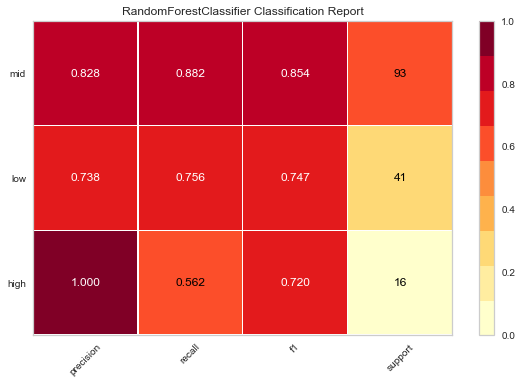

{'precision': {'high': 1.0, 'low': 0.7380952380952381, 'mid': 0.8282828282828283}, 'recall': {'high': 0.5625, 'low': 0.7560975609756098, 'mid': 0.8817204301075269}, 'f1': {'high': 0.72, 'low': 0.746987951807229, 'mid': 0.8541666666666666}, 'support': {'high': 0.10666666666666667, 'low': 0.2733333333333333, 'mid': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


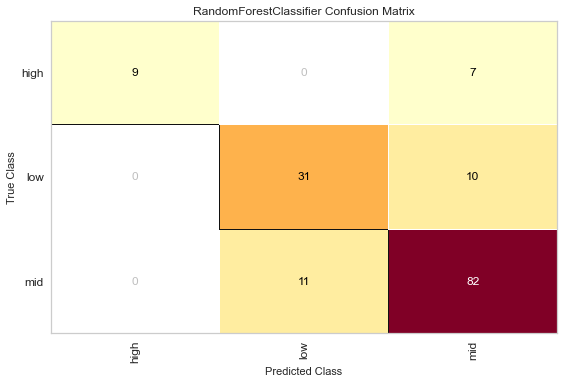

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


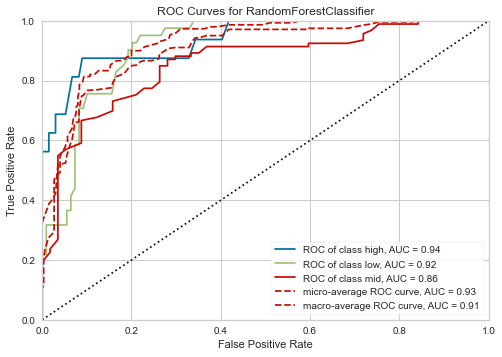

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:256: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


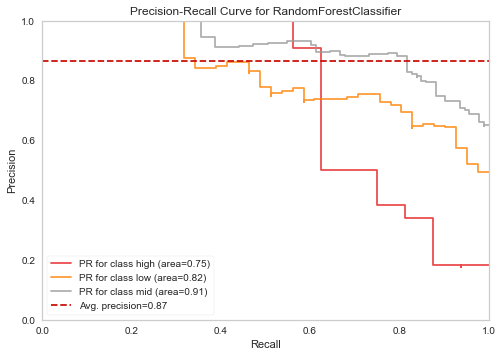

Confusion Matrix: Backward RFC 
 [[ 9  0  7]
 [ 0 31 10]
 [ 0 11 82]]
F1 SCORE: Backward RFC 0.7733333333333333
Cohen Kappa: Backward RFC 0.6324494618009976
CR Report: Backward RFC 
               precision    recall  f1-score   support

        high       1.00      0.56      0.72        16
         low       0.74      0.76      0.75        41
         mid       0.83      0.88      0.85        93

    accuracy                           0.81       150
   macro avg       0.86      0.73      0.77       150
weighted avg       0.82      0.81      0.81       150

MCC: Backward RFC 0.6355275007324407
Accuracy: Backward RFC 0.8133333333333334


In [1077]:
#Predicting Backward RFC

rfc = RandomForestClassifier(n_jobs=-1, criterion='entropy', random_state=0)

rfc.fit(x_train_sfs_b_rfc, Y_train)
y_pred_b_rfc = rfc.predict(x_test_sfs_b_rfc)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred_b_rfc).sum()) / y_pred_b_rfc.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(rfc, classes=["high","low", "mid"], support=True, average='micro')
visualizer.fit(x_train_sfs_b_rfc, Y_train)        # Fit the visualizer and the model
visualizer.score(x_test_sfs_b_rfc, Y_test)        # Evaluate the model on the test data
visualizer.show() 
print(visualizer.scores_)

#ConfusionMatrix
cm = ConfusionMatrix(rfc, classes=["high","low", "mid"])
cm.fit(x_train_sfs_b_rfc, Y_train)
cm.score(x_test_sfs_b_rfc, Y_test)
cm.show()

#ROCAUC
visualizer = ROCAUC(rfc, classes=["high","low", "mid"], average= "micro")
visualizer.fit(x_train_sfs_b_rfc, Y_train)        # Fit the training data to the visualizer
visualizer.score(x_test_sfs_b_rfc, Y_test)        # Evaluate the model on the test data
visualizer.show()  

#PrecisionRecall Curve
viz = PrecisionRecallCurve(
    rfc,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_sfs_b_rfc, Y_train)
viz.score(x_test_sfs_b_rfc, Y_test)
viz.show()

print("Confusion Matrix: Backward RFC \n",confusion_matrix(Y_test, y_pred_b_rfc))
print("F1 SCORE: Backward RFC",f1_score(Y_test, y_pred_rfc, average='micro'))
print("Cohen Kappa: Backward RFC",cohen_kappa_score(Y_test, y_pred_b_rfc))
print("CR Report: Backward RFC \n",classification_report(Y_test, y_pred_b_rfc))
print("MCC: Backward RFC",matthews_corrcoef(Y_test, y_pred_b_rfc))
print("Accuracy: Backward RFC",accuracy_score(Y_test, y_pred_b_rfc))

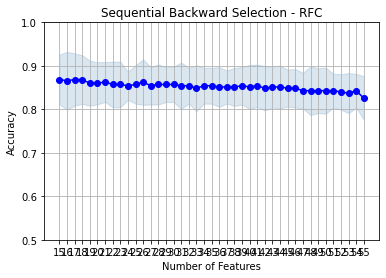

('weight_std', 'volume_std', 'saturate_std', 'protein', 'fibre', 'fibre_std', 'f_energy_fat', 'f_energy_sugar', 'f_grains', 'f_sauces', 'f_water', 'f_dairy_weight', 'f_fish_weight', 'f_poultry_weight', 'f_readymade_weight')


In [824]:
#PLOTTING BACKWARD - Random Forest Classifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_b_rfc.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection - RFC')
plt.grid()
plt.show()
print(sfs_b_rfc.k_feature_names_)

In [825]:
x_train_sfs_b_rfc.shape

(350, 15)

In [826]:
X_train.shape

(350, 55)

In [827]:
x_test_sfs_b_rfc.shape

(150, 15)

In [828]:
X_test.shape

(150, 55)

In [834]:
f15_dtc = sfs_f_dtc.k_feature_names_
b15_dtc = sfs_b_dtc.k_feature_names_
print((set(f15_dtc).intersection(set(b15_dtc))))

{'f_water', 'f_energy_carb', 'f_grains', 'f_eggs_weight'}


In [831]:
f15_knn = sfs_f_knn.k_feature_names_
b15_knn = sfs_b_knn.k_feature_names_
print((set(f15_knn).intersection(set(b15_knn))))

{'f_spirits', 'f_sauces', 'f_fish_weight'}


In [832]:
f15_naive = sfs_f_naive.k_feature_names_
b15_naive = sfs_b_naive.k_feature_names_
print((set(f15_naive).intersection(set(b15_naive))))

{'protein_std', 'carb', 'sugar', 'weight_std'}


In [833]:
f15_rfc = sfs_f_rfc.k_feature_names_
b15_rfc = sfs_b_rfc.k_feature_names_
print((set(f15_rfc).intersection(set(b15_rfc))))

{'weight_std', 'protein', 'f_fish_weight', 'saturate_std', 'f_grains', 'f_sauces'}


In [835]:
f15_svm = sfs_f_svm.k_feature_names_
b15_svm = sfs_b_svm.k_feature_names_
print((set(f15_svm).intersection(set(b15_svm))))

{'f_meat_red', 'f_eggs_weight', 'f_energy_sugar', 'f_dairy', 'f_fish_weight', 'f_meat_red_weight', 'saturate_std', 'weight_std'}


Test set accuracy: 76.67 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


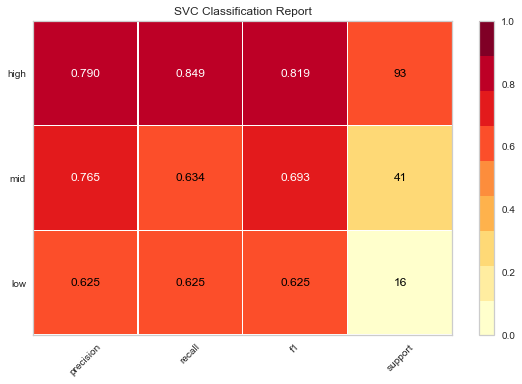

{'precision': {'low': 0.625, 'mid': 0.7647058823529411, 'high': 0.79}, 'recall': {'low': 0.625, 'mid': 0.6341463414634146, 'high': 0.8494623655913979}, 'f1': {'low': 0.625, 'mid': 0.6933333333333332, 'high': 0.8186528497409327}, 'support': {'low': 0.10666666666666667, 'mid': 0.2733333333333333, 'high': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


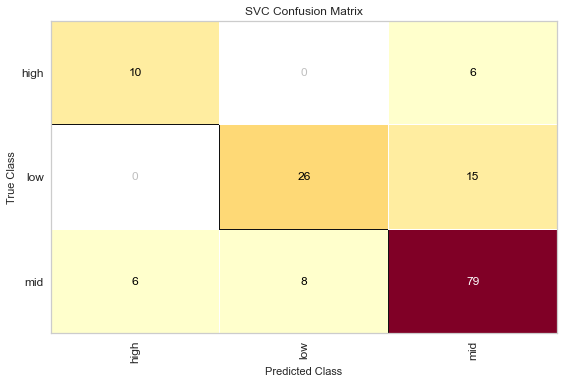

[[10  0  6]
 [ 0 26 15]
 [ 6  8 79]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


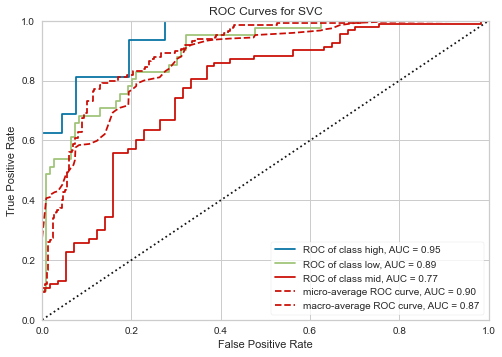

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:256: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


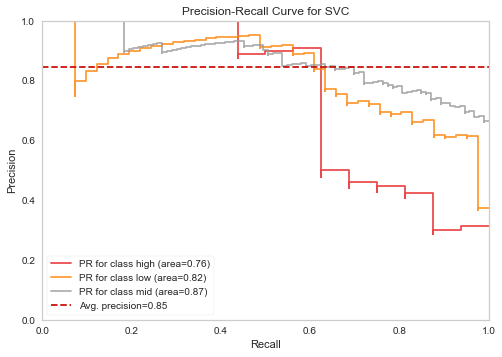

F1 SCORE: Forward SVM 0.7666666666666667
Cohen Kappa: Forward SVM 0.5454545454545454
CR Report: Forward SVM 
               precision    recall  f1-score   support

        high       0.62      0.62      0.62        16
         low       0.76      0.63      0.69        41
         mid       0.79      0.85      0.82        93

    accuracy                           0.77       150
   macro avg       0.73      0.70      0.71       150
weighted avg       0.77      0.77      0.76       150

MCC: Forward SVM 0.5481319822943078
Accuracy: Forward SVM 0.7666666666666667


In [1056]:
#Predicting SVM for FULL DATASET
clf_svm = svm.SVC(kernel='linear',C=1)

clf_svm.fit(org_X_train, org_Y_train)
y_pred_full_svm = clf_svm.predict(org_X_test)

# Compute the accuracy of the prediction
acc = float((org_Y_test == y_pred_full_svm).sum()) / y_pred_full_svm.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(clf_svm, classes=["low", "mid", "high"], support=True, average='micro')

visualizer.fit(org_X_train, org_Y_train)        # Fit the visualizer and the model
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show() 

print(visualizer.scores_)
#ConfusionMatrix
cm = ConfusionMatrix(clf_svm, classes=["high","low", "mid"])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(org_X_train, org_Y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(org_X_test, org_Y_test)

# How did we do?
cm.show()
print(confusion_matrix(org_Y_test, y_pred_full_svm))

# from sklearn.metrics import confusion_matrix

#ROCAUC
visualizer = ROCAUC(clf_svm, classes=["high","low", "mid"], average= "micro")

visualizer.fit(org_X_train, org_Y_train)        # Fit the training data to the visualizer
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show()  

viz = PrecisionRecallCurve(
    clf_svm,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(org_X_train, org_Y_train)
viz.score(org_X_test, org_Y_test)
viz.show()

print("F1 SCORE: Forward SVM",f1_score(org_Y_test, y_pred_full_svm, average='micro'))
print("Cohen Kappa: Forward SVM",cohen_kappa_score(org_Y_test, y_pred_full_svm))
print("CR Report: Forward SVM \n",classification_report(org_Y_test, y_pred_full_svm))
print("MCC: Forward SVM",matthews_corrcoef(org_Y_test, y_pred_full_svm))
print("Accuracy: Forward SVM",accuracy_score(org_Y_test, y_pred_full_svm))

Test set accuracy: 81.33 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


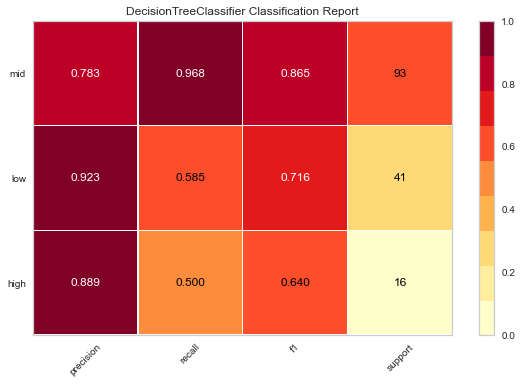

{'precision': {'high': 0.8888888888888888, 'low': 0.9230769230769231, 'mid': 0.782608695652174}, 'recall': {'high': 0.5, 'low': 0.5853658536585366, 'mid': 0.967741935483871}, 'f1': {'high': 0.64, 'low': 0.7164179104477613, 'mid': 0.8653846153846155}, 'support': {'high': 0.10666666666666667, 'low': 0.2733333333333333, 'mid': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


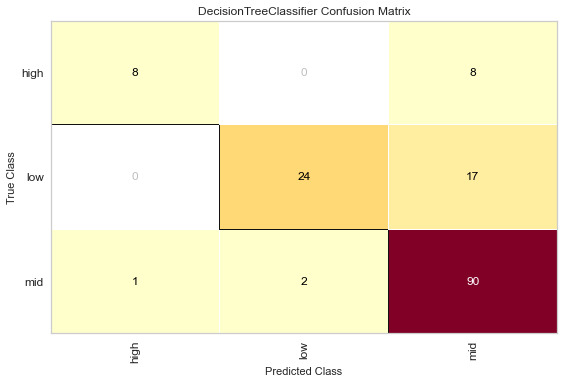

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


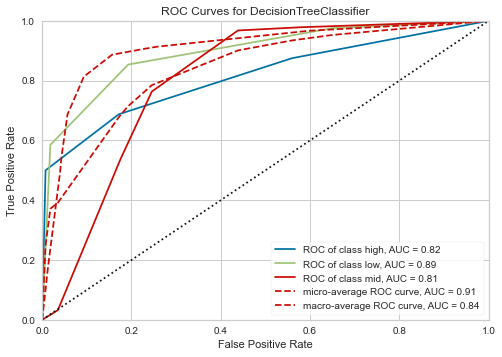

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:256: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


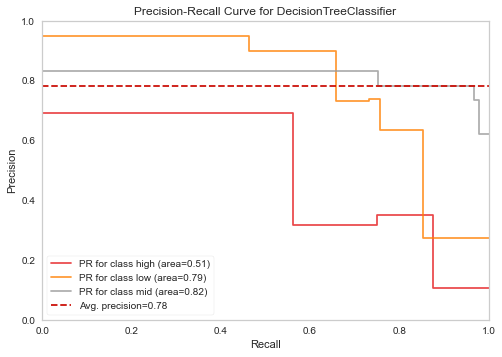

Confusion Matrix: Backward DTC 
 [[ 8  0  8]
 [ 0 24 17]
 [ 1  2 90]]
F1 SCORE: Backward DTC 0.8133333333333334
Cohen Kappa: Backward DTC 0.6035865974516281
CR Report: Backward DTC 
               precision    recall  f1-score   support

        high       0.89      0.50      0.64        16
         low       0.92      0.59      0.72        41
         mid       0.78      0.97      0.87        93

    accuracy                           0.81       150
   macro avg       0.86      0.68      0.74       150
weighted avg       0.83      0.81      0.80       150

MCC: Backward DTC 0.6348087920452842
Accuracy: Backward DTC 0.8133333333333334


In [1060]:
#Predicting DTC for FULL DATASET
dtc = DecisionTreeClassifier(criterion="entropy", random_state=0, splitter="best", max_depth=3)

dtc.fit(org_X_train, org_Y_train)
y_pred_full_dtc = dtc.predict(org_X_test)

# Compute the accuracy of the prediction
acc = float((org_Y_test == y_pred_full_dtc).sum()) / y_pred_full_dtc.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(dtc, classes=["high","low", "mid"], support=True, average='micro')

visualizer.fit(org_X_train, org_Y_train)        # Fit the visualizer and the model
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show() 
print(visualizer.scores_)

#ConfusionMatrix
cm = ConfusionMatrix(dtc, classes=["high","low", "mid"])
cm.fit(org_X_train, org_Y_train)
cm.score(org_X_test, org_Y_test)
cm.show()

#ROCAUC
visualizer = ROCAUC(dtc, classes=["high","low", "mid"], average= "micro")

visualizer.fit(org_X_train, org_Y_train)        # Fit the training data to the visualizer
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show()  

viz = PrecisionRecallCurve(
    dtc,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(org_X_train, org_Y_train)
viz.score(org_X_test, org_Y_test)
viz.show()

print("Confusion Matrix: Backward DTC \n",confusion_matrix(org_Y_test, y_pred_full_dtc))
print("F1 SCORE: Backward DTC",f1_score(org_Y_test, y_pred_full_dtc, average='micro'))
print("Cohen Kappa: Backward DTC",cohen_kappa_score(org_Y_test, y_pred_full_dtc))
print("CR Report: Backward DTC \n",classification_report(org_Y_test, y_pred_full_dtc))
print("MCC: Backward DTC",matthews_corrcoef(org_Y_test, y_pred_full_dtc))
print("Accuracy: Backward DTC",accuracy_score(org_Y_test, y_pred_full_dtc))

Test set accuracy: 66.67 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


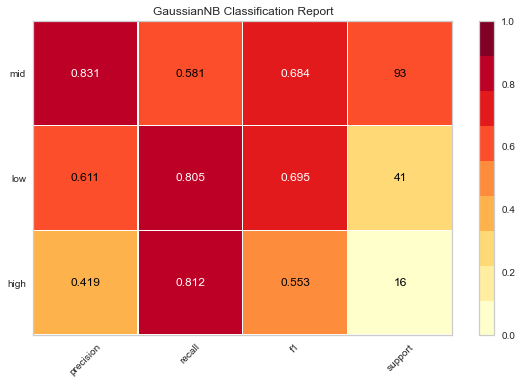

{'precision': {'high': 0.41935483870967744, 'low': 0.6111111111111112, 'mid': 0.8307692307692308}, 'recall': {'high': 0.8125, 'low': 0.8048780487804879, 'mid': 0.5806451612903226}, 'f1': {'high': 0.5531914893617021, 'low': 0.6947368421052632, 'mid': 0.6835443037974683}, 'support': {'high': 0.10666666666666667, 'low': 0.2733333333333333, 'mid': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


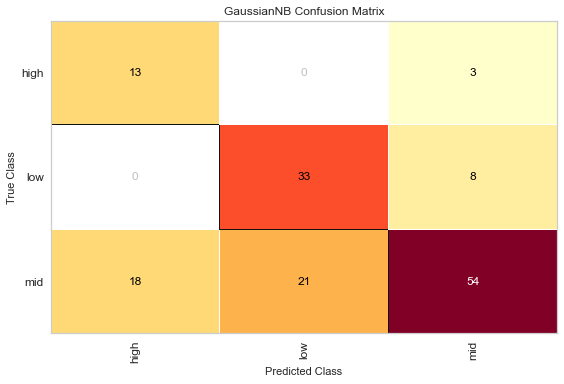

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


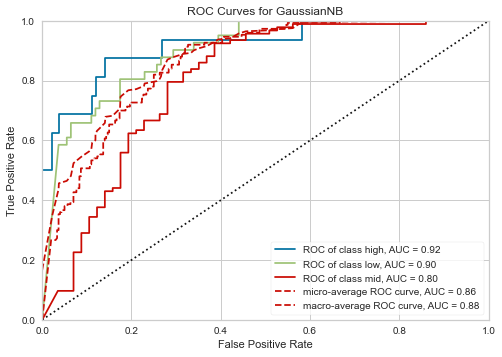

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:256: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


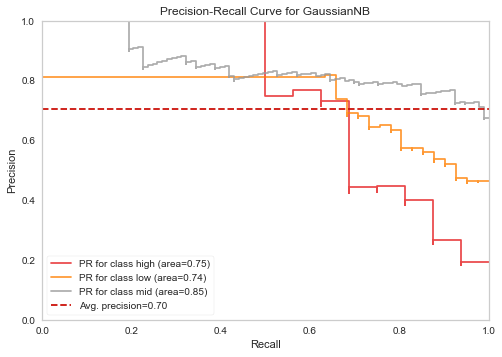

Confusion Matrix: Backward NAIVE 
 [[13  0  3]
 [ 0 33  8]
 [18 21 54]]
F1 SCORE: Backward NAIVE 0.6666666666666666
Cohen Kappa: Backward NAIVE 0.4543470352855583
CR Report: Backward NAIVE 
               precision    recall  f1-score   support

        high       0.42      0.81      0.55        16
         low       0.61      0.80      0.69        41
         mid       0.83      0.58      0.68        93

    accuracy                           0.67       150
   macro avg       0.62      0.73      0.64       150
weighted avg       0.73      0.67      0.67       150

MCC: Backward NAIVE 0.4768179104614359
Accuracy: Backward NAIVE 0.6666666666666666


In [1061]:
#Predicting NAIVE FULL DATASET
model_naive = GaussianNB()

model_naive.fit(org_X_train, org_Y_train)
y_pred_full_naive = model_naive.predict(org_X_test)

# Compute the accuracy of the prediction
acc = float((org_Y_test == y_pred_full_naive).sum()) / y_pred_full_naive.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(model_naive, classes=["high","low", "mid"], support=True, average='micro')
visualizer.fit(org_X_train, org_Y_train)        # Fit the visualizer and the model
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show() 
print(visualizer.scores_)

#ConfusionMatrix
cm = ConfusionMatrix(model_naive, classes=["high","low", "mid"])
cm.fit(org_X_train, org_Y_train)
cm.score(org_X_test, org_Y_test)
cm.show()

#ROCAUC
visualizer = ROCAUC(model_naive, classes=["high","low", "mid"], average= "micro")
visualizer.fit(org_X_train, org_Y_train)        # Fit the training data to the visualizer
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show()  

#PrecisionRecall Curve
viz = PrecisionRecallCurve(
    model_naive,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(org_X_train, org_Y_train)
viz.score(org_X_test, org_Y_test)
viz.show()

print("Confusion Matrix: Backward NAIVE \n",confusion_matrix(org_Y_test, y_pred_full_naive))
print("F1 SCORE: Backward NAIVE",f1_score(org_Y_test, y_pred_full_naive, average='micro'))
print("Cohen Kappa: Backward NAIVE",cohen_kappa_score(org_Y_test, y_pred_full_naive))
print("CR Report: Backward NAIVE \n",classification_report(org_Y_test, y_pred_full_naive))
print("MCC: Backward NAIVE",matthews_corrcoef(org_Y_test, y_pred_full_naive))
print("Accuracy: Backward NAIVE",accuracy_score(org_Y_test, y_pred_full_naive))

Test set accuracy: 76.67 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


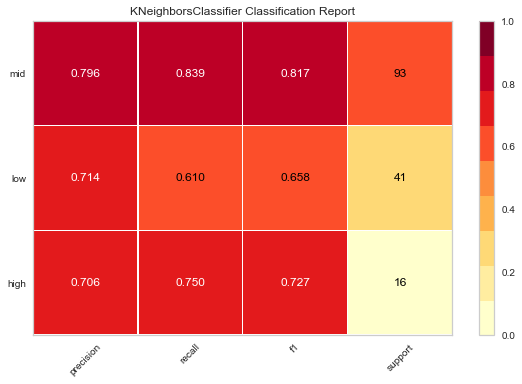

{'precision': {'high': 0.7058823529411765, 'low': 0.7142857142857143, 'mid': 0.7959183673469388}, 'recall': {'high': 0.75, 'low': 0.6097560975609756, 'mid': 0.8387096774193549}, 'f1': {'high': 0.7272727272727272, 'low': 0.6578947368421052, 'mid': 0.8167539267015708}, 'support': {'high': 0.10666666666666667, 'low': 0.2733333333333333, 'mid': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


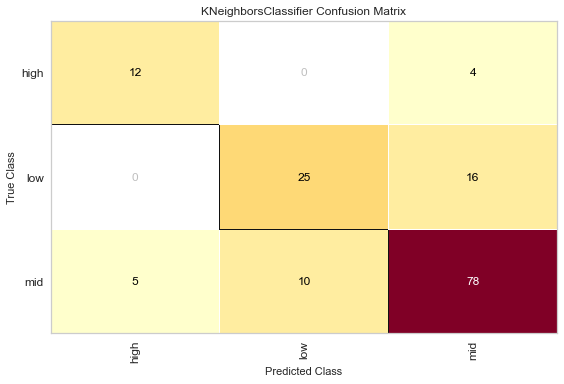

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


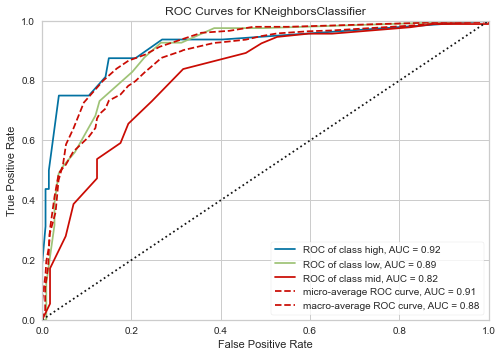

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


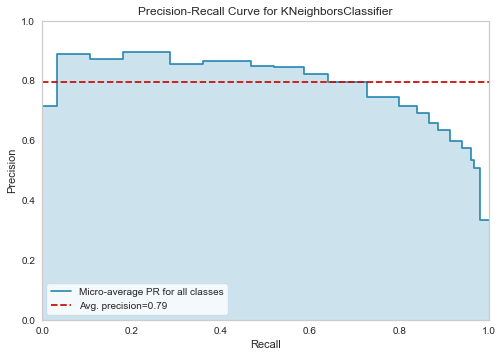

Confusion Matrix: Backward KNN 
 [[12  0  4]
 [ 0 25 16]
 [ 5 10 78]]
F1 SCORE: Backward KNN 0.7666666666666667
Cohen Kappa: Backward KNN 0.5504752119188286
CR Report: Backward KNN 
               precision    recall  f1-score   support

        high       0.71      0.75      0.73        16
         low       0.71      0.61      0.66        41
         mid       0.80      0.84      0.82        93

    accuracy                           0.77       150
   macro avg       0.74      0.73      0.73       150
weighted avg       0.76      0.77      0.76       150

MCC: Backward KNN 0.552084224055116
Accuracy: Backward KNN 0.7666666666666667


In [1074]:
#Predicting KNN FULL DATASET
knn = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)

knn.fit(org_X_train, org_Y_train)
y_pred_full_knn = knn.predict(org_X_test)

# Compute the accuracy of the prediction
acc = float((org_Y_test == y_pred_full_knn).sum()) / y_pred_full_knn.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(knn, classes=["high","low", "mid"], support=True, average='micro')
visualizer.fit(org_X_train, org_Y_train)        # Fit the visualizer and the model
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show() 
print(visualizer.scores_)

#ConfusionMatrix
cm = ConfusionMatrix(knn, classes=["high","low", "mid"])
cm.fit(org_X_train, org_Y_train)
cm.score(org_X_test, org_Y_test)
cm.show()

#ROCAUC
visualizer = ROCAUC(knn, classes=["high","low", "mid"], average= "micro")
visualizer.fit(org_X_train, org_Y_train)        # Fit the training data to the visualizer
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show()  

#PrecisionRecall Curve
viz = PrecisionRecallCurve(
    knn,
    classes=["high","low", "mid"],
    per_class=False,
    cmap="Set1"
)
viz.fit(org_X_train, org_Y_train)
viz.score(org_X_test, org_Y_test)
viz.show()

print("Confusion Matrix: Backward KNN \n",confusion_matrix(org_Y_test, y_pred_full_knn))
print("F1 SCORE: Backward KNN",f1_score(org_Y_test, y_pred_full_knn, average='micro'))
print("Cohen Kappa: Backward KNN",cohen_kappa_score(org_Y_test, y_pred_full_knn))
print("CR Report: Backward KNN \n",classification_report(org_Y_test, y_pred_full_knn))
print("MCC: Backward KNN",matthews_corrcoef(org_Y_test, y_pred_full_knn))
print("Accuracy: Backward KNN",accuracy_score(org_Y_test, y_pred_full_knn))

Test set accuracy: 82.67 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


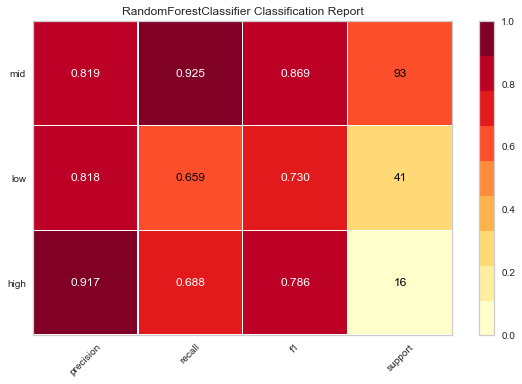

{'precision': {'high': 0.9166666666666666, 'low': 0.8181818181818182, 'mid': 0.819047619047619}, 'recall': {'high': 0.6875, 'low': 0.6585365853658537, 'mid': 0.9247311827956989}, 'f1': {'high': 0.7857142857142857, 'low': 0.7297297297297297, 'mid': 0.8686868686868686}, 'support': {'high': 0.10666666666666667, 'low': 0.2733333333333333, 'mid': 0.62}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


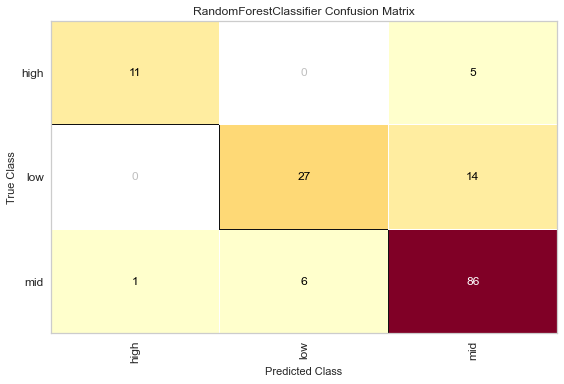

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


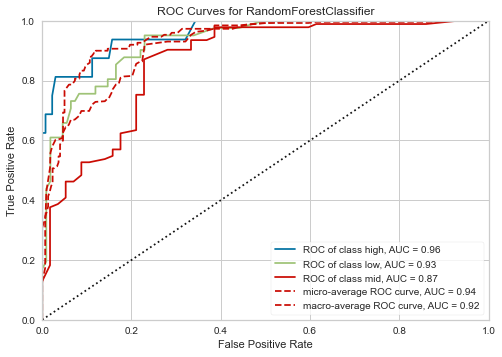

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:256: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


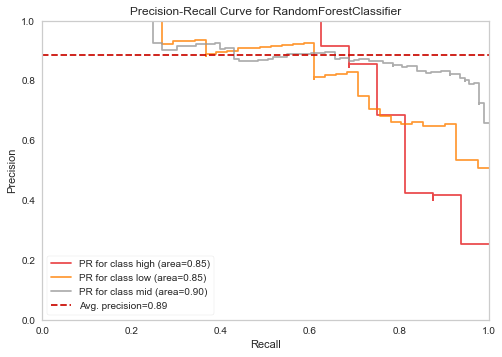

Confusion Matrix: Backward RFC 
 [[11  0  5]
 [ 0 27 14]
 [ 1  6 86]]
F1 SCORE: Backward RFC 0.8266666666666667
Cohen Kappa: Backward RFC 0.6514745308310992
CR Report: Backward RFC 
               precision    recall  f1-score   support

        high       0.92      0.69      0.79        16
         low       0.82      0.66      0.73        41
         mid       0.82      0.92      0.87        93

    accuracy                           0.83       150
   macro avg       0.85      0.76      0.79       150
weighted avg       0.83      0.83      0.82       150

MCC: Backward RFC 0.6599428754190889
Accuracy: Backward RFC 0.8266666666666667


In [1064]:
#Predicting RFC FULL DATASET

rfc = RandomForestClassifier(n_jobs=-1, criterion='entropy', random_state=0)

rfc.fit(org_X_train, org_Y_train)
y_pred_full_rfc = rfc.predict(org_X_test)

# Compute the accuracy of the prediction
acc = float((org_Y_test == y_pred_full_rfc).sum()) / y_pred_full_rfc.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

#ClassificationReport
visualizer = ClassificationReport(rfc, classes=["high","low", "mid"], support=True, average='micro')
visualizer.fit(org_X_train, org_Y_train)        # Fit the visualizer and the model
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show() 
print(visualizer.scores_)

#ConfusionMatrix
cm = ConfusionMatrix(rfc, classes=["high","low", "mid"])
cm.fit(org_X_train, org_Y_train)
cm.score(org_X_test, org_Y_test)
cm.show()

#ROCAUC
visualizer = ROCAUC(rfc, classes=["high","low", "mid"], average= "micro")
visualizer.fit(org_X_train, org_Y_train)        # Fit the training data to the visualizer
visualizer.score(org_X_test, org_Y_test)        # Evaluate the model on the test data
visualizer.show()  

#PrecisionRecall Curve
viz = PrecisionRecallCurve(
    rfc,
    classes=["high","low", "mid"],
    per_class=True,
    cmap="Set1"
)
viz.fit(org_X_train, org_Y_train)
viz.score(org_X_test, org_Y_test)
viz.show()

print("Confusion Matrix: Backward RFC \n",confusion_matrix(org_Y_test, y_pred_full_rfc))
print("F1 SCORE: Backward RFC",f1_score(org_Y_test, y_pred_full_rfc, average='micro'))
print("Cohen Kappa: Backward RFC",cohen_kappa_score(org_Y_test, y_pred_full_rfc))
print("CR Report: Backward RFC \n",classification_report(org_Y_test, y_pred_full_rfc))
print("MCC: Backward RFC",matthews_corrcoef(org_Y_test, y_pred_full_rfc))
print("Accuracy: Backward RFC",accuracy_score(org_Y_test, y_pred_full_rfc))

In [20]:
lr = LogisticRegression(solver='lbfgs')
naive = GaussianNB()
decision = DecisionTreeClassifier(criterion="entropy", random_state=0)
random = RandomForestClassifier(n_jobs=-1, criterion='entropy', random_state=0)

No Skill (Random chance Prediction): ROC AUC=0.500
Logistic Regression: ROC AUC=0.914
Random Forest: ROC AUC=0.929
Naive Bayes: ROC AUC=0.906
Decision Tree: ROC AUC=0.794


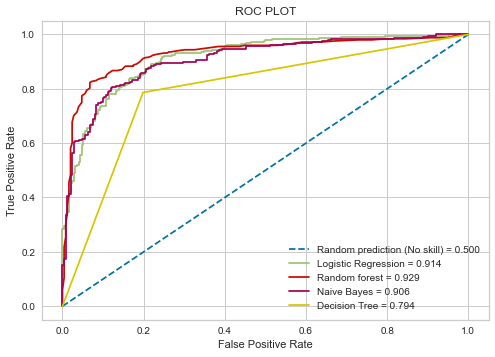

In [21]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=0)

lr.fit(trainX, trainy)
naive.fit(trainX, trainy)
decision.fit(trainX, trainy)
random.fit(trainX, trainy)

r_probs = [0 for _ in range(len(testy))]
lr_probs = lr.predict_proba(testX)
rfc_probs = random.predict_proba(testX)
naive_probs = naive.predict_proba(testX)
decision_probs = decision.predict_proba(testX)

lr_probs = lr_probs[:,1]
rfc_probs = rfc_probs[:,1]
naive_probs = naive_probs[:,1]
decision_probs = decision_probs[:,1]

r_auc = roc_auc_score(testy, r_probs)
lr_auc = roc_auc_score(testy, lr_probs)
rfc_auc = roc_auc_score(testy, rfc_probs)
naive_auc = roc_auc_score(testy, naive_probs)
decision_auc = roc_auc_score(testy, decision_probs)

print('No Skill (Random chance Prediction): ROC AUC=%.3f' % (r_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
print("Random Forest: ROC AUC=%.3f" % (rfc_auc))
print("Naive Bayes: ROC AUC=%.3f" % (naive_auc))
print("Decision Tree: ROC AUC=%.3f" % (decision_auc))

r_fpr, r_tpr, _ = roc_curve(testy, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(testy, rfc_probs)
naive_fpr, naive_tpr, _ = roc_curve(testy, naive_probs)
decision_fpr, decision_tpr, _ = roc_curve(testy, decision_probs)

#PLOTTING THE ROC CURVE
plt.plot(r_fpr, r_tpr, linestyle='--', label = 'Random prediction (No skill) = %.3f' % r_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label = 'Logistic Regression = %.3f' % lr_auc)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label = 'Random forest = %.3f' % rfc_auc)
plt.plot(naive_fpr, naive_tpr, linestyle='-', label = 'Naive Bayes = %.3f' % naive_auc)
plt.plot(decision_fpr, decision_tpr, linestyle='-', label = 'Decision Tree = %.3f' % decision_auc)
plt.title("ROC PLOT")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [25]:
lr_fpr.shape

(132,)

In [26]:
lr_tpr.shape

(132,)

In [27]:
decision_fpr.shape

(3,)

In [28]:
decision_tpr.shape

(3,)

In [29]:
naive_fpr.shape

(126,)